In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import scale

from data_cube import DataCube
from ssm import SSM
from similarity_network_fusion import SNF

In [2]:
from tslearn.metrics import dtw, dtw_path

In [3]:
dc = DataCube(
    subjects="all",
    gestures=["1"],
    channels=["2", "6"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.normalize_modalities(smooth=True)

---

subject 30; gesture 1_1_2


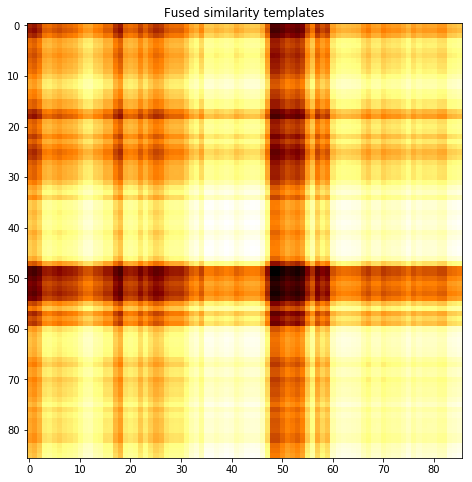

subject 30; gesture 1_1_1


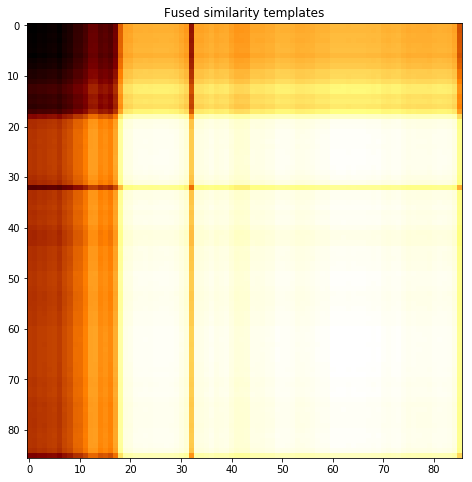

subject 30; gesture 1_0_1


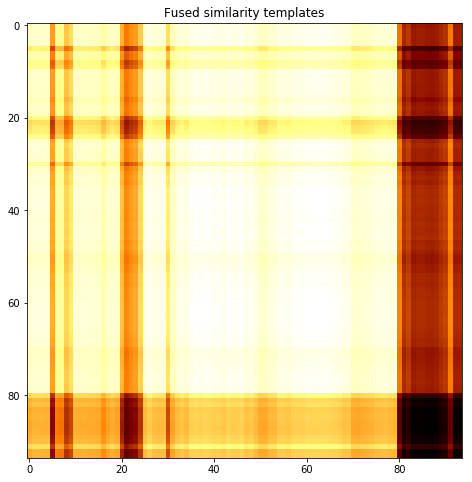

subject 30; gesture 1_0_2


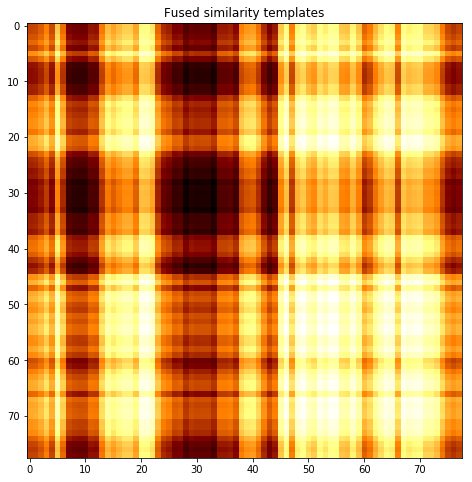

subject 06; gesture 1_1_2


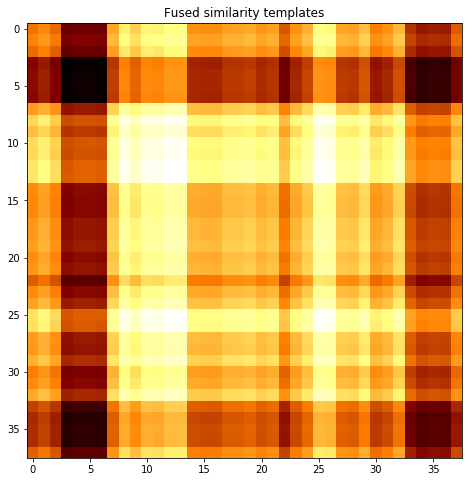

subject 06; gesture 1_1_1


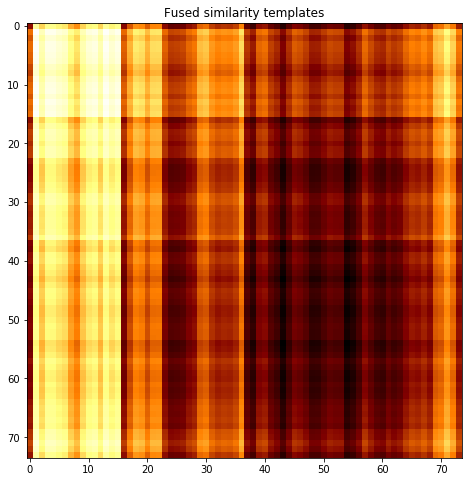

subject 06; gesture 1_0_1


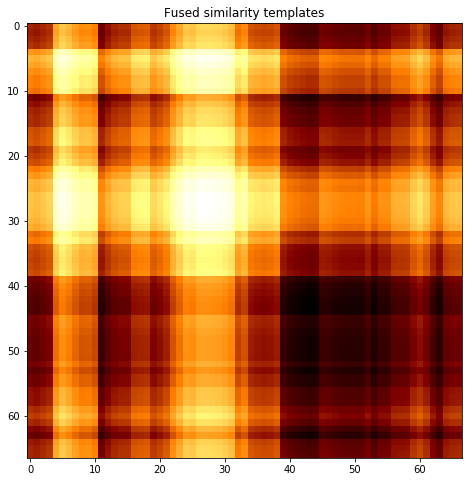

subject 06; gesture 1_0_2


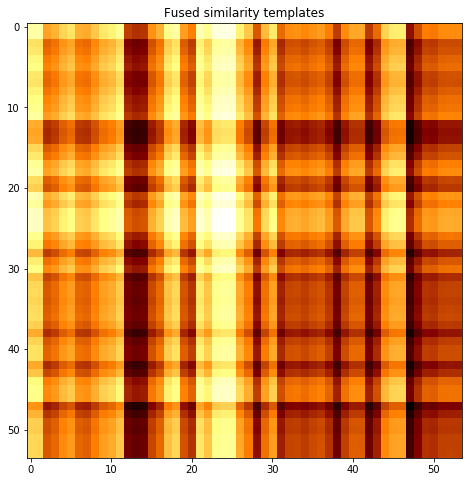

subject 09; gesture 1_1_2


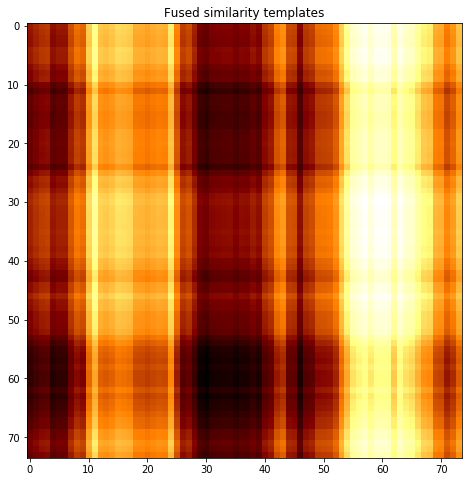

subject 09; gesture 1_1_1


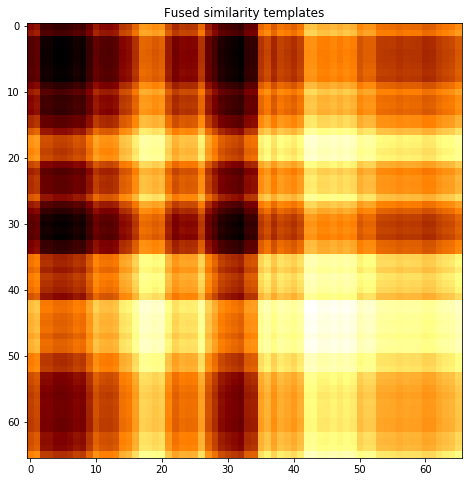

subject 09; gesture 1_0_1


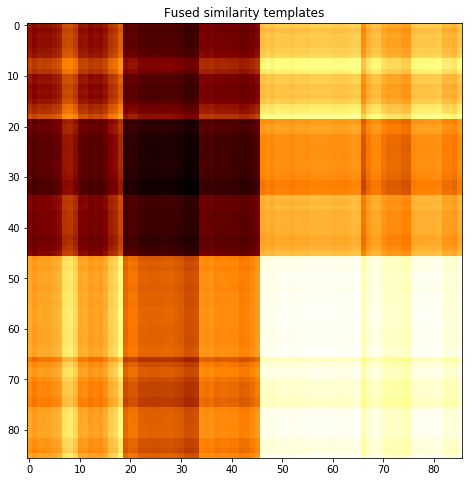

subject 09; gesture 1_0_2


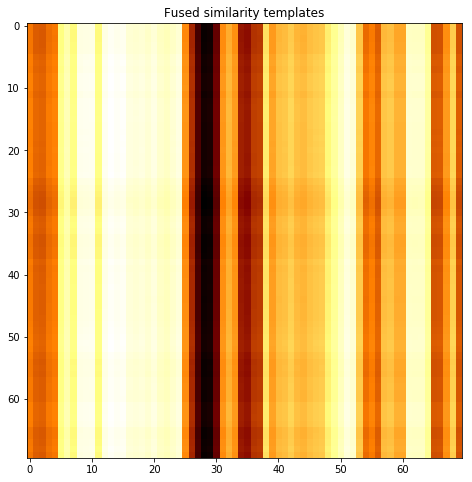

subject 03; gesture 1_1_2


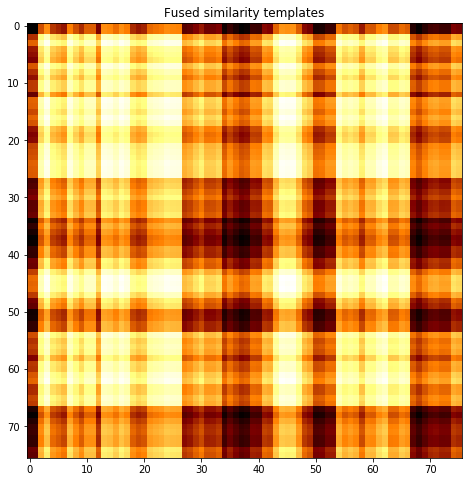

subject 03; gesture 1_1_1


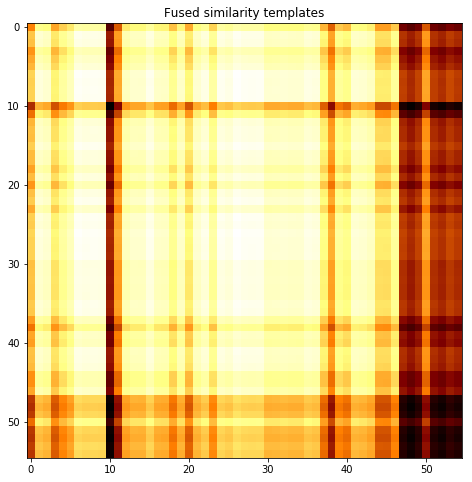

subject 03; gesture 1_0_1


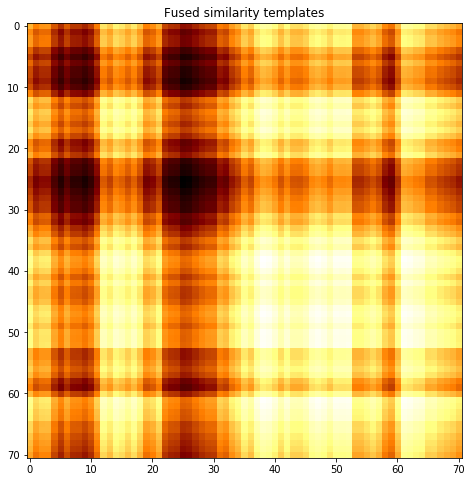

subject 03; gesture 1_0_2


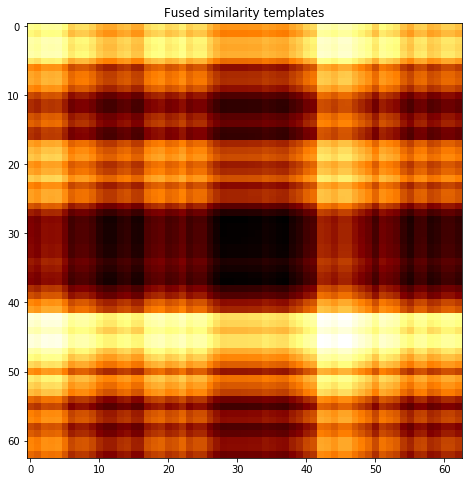

subject 05; gesture 1_1_2


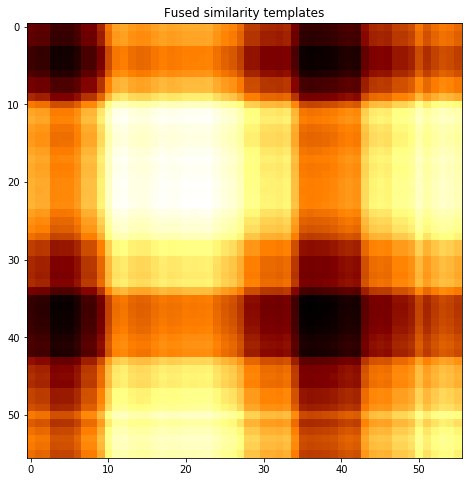

subject 05; gesture 1_1_1


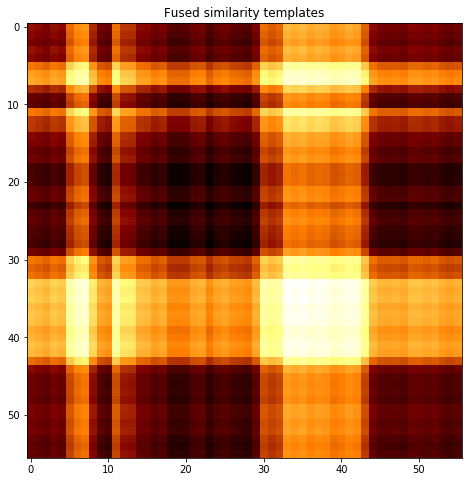

subject 05; gesture 1_0_1


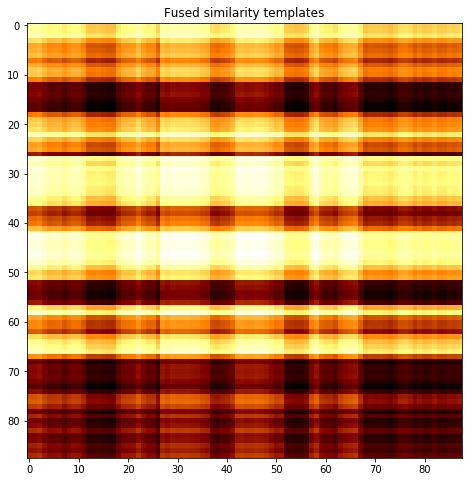

subject 05; gesture 1_0_2


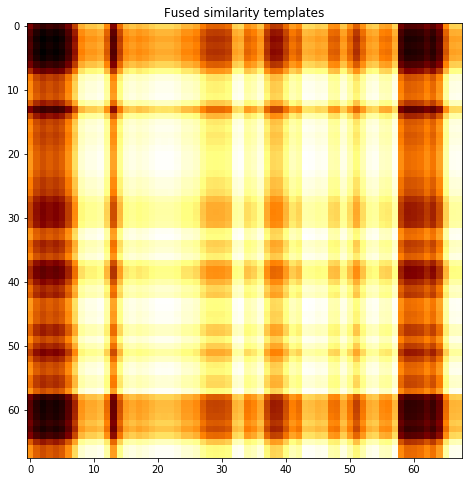

subject 21; gesture 1_1_2


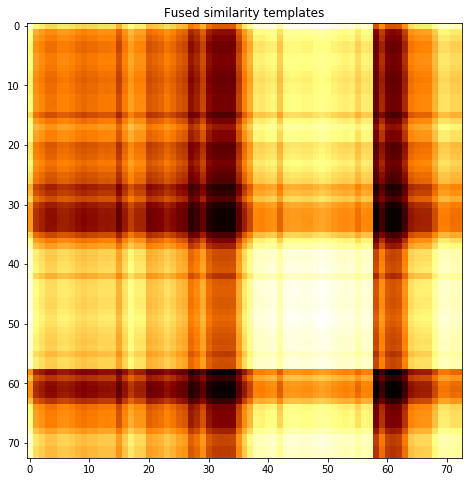

subject 21; gesture 1_1_1


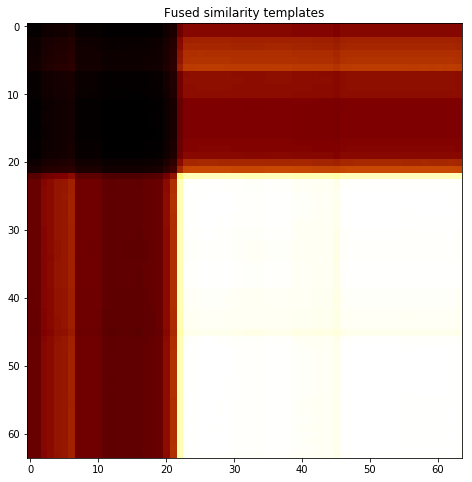

subject 21; gesture 1_0_1


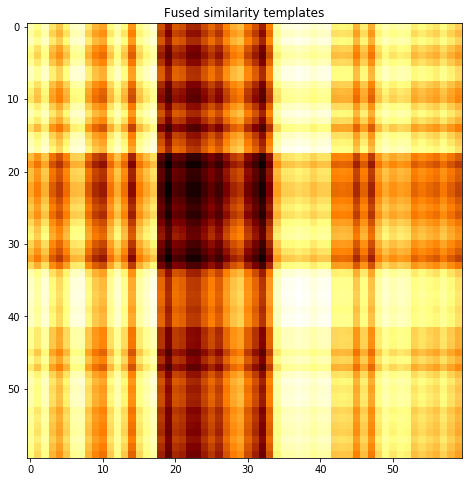

subject 21; gesture 1_0_2


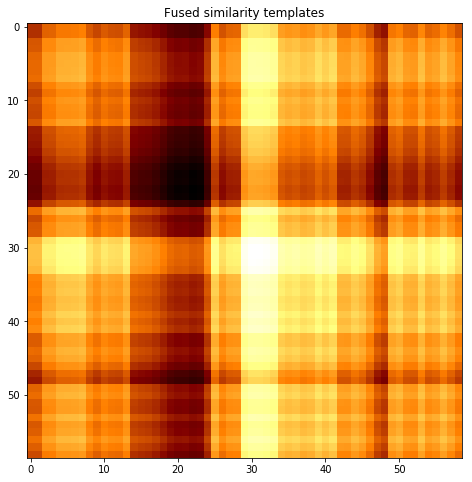

subject 17; gesture 1_1_2


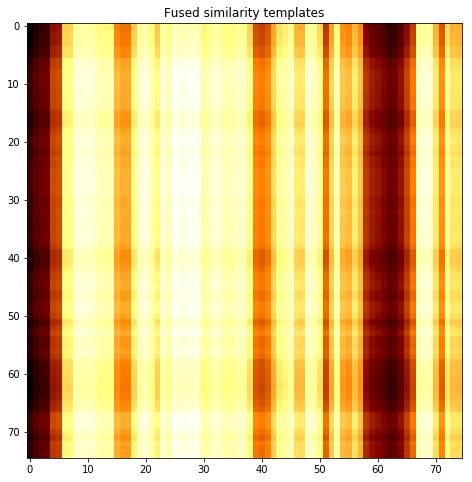

subject 17; gesture 1_1_1


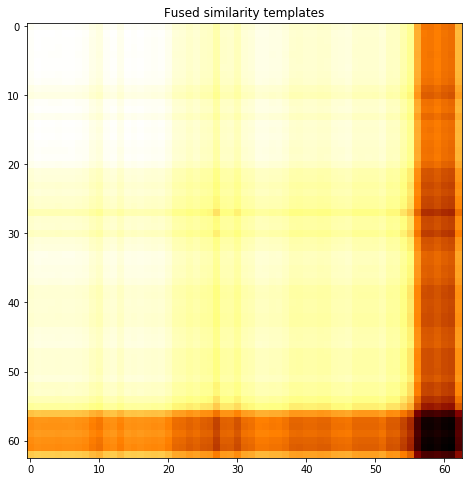

subject 17; gesture 1_0_1


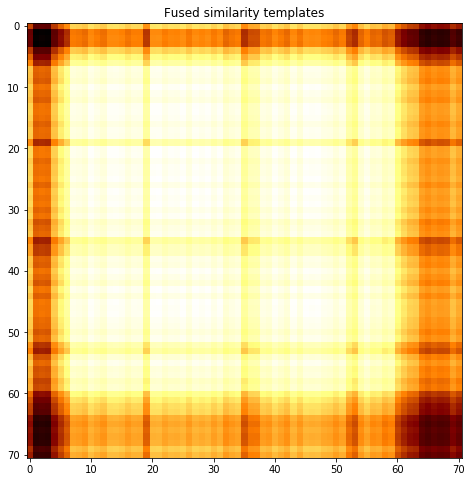

subject 17; gesture 1_0_2


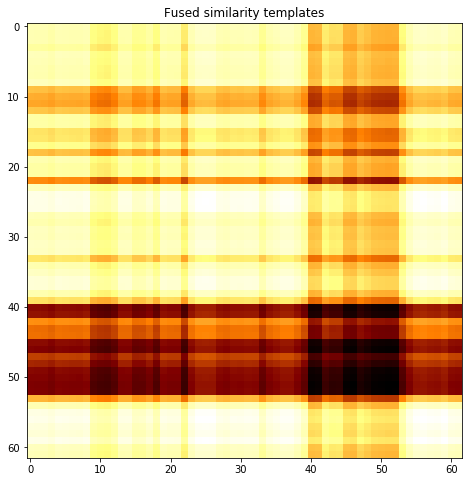

subject 01; gesture 1_1_2


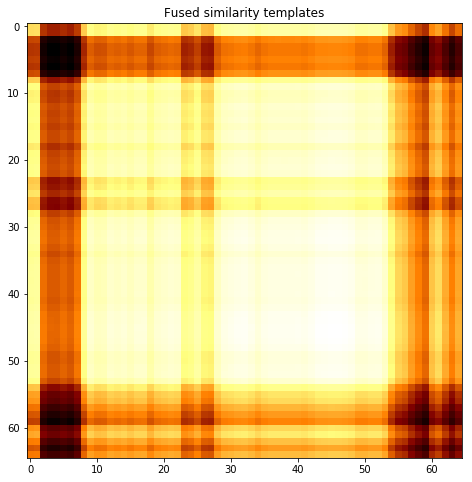

subject 01; gesture 1_1_1


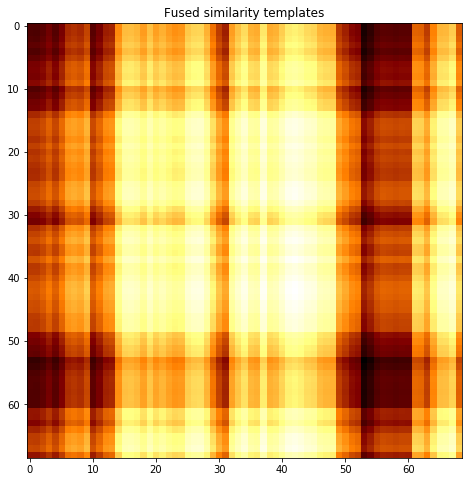

subject 01; gesture 1_0_1


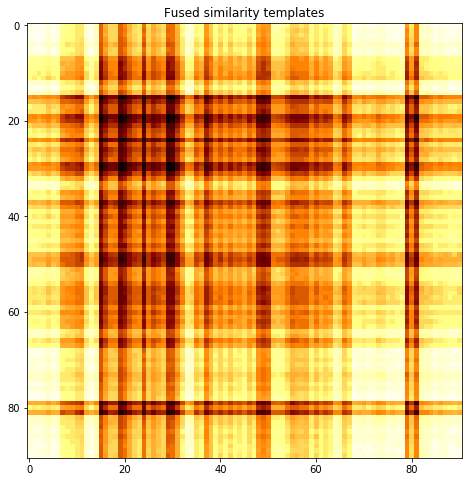

subject 01; gesture 1_0_2


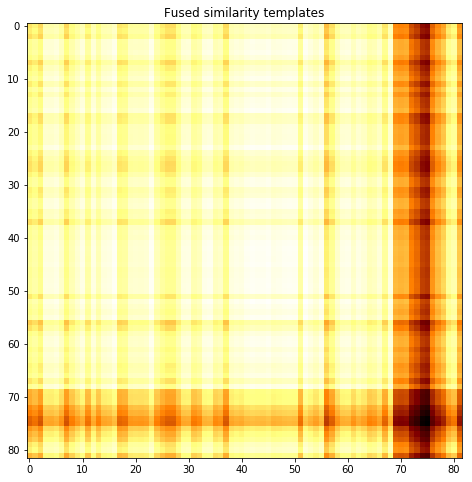

subject 16; gesture 1_1_2


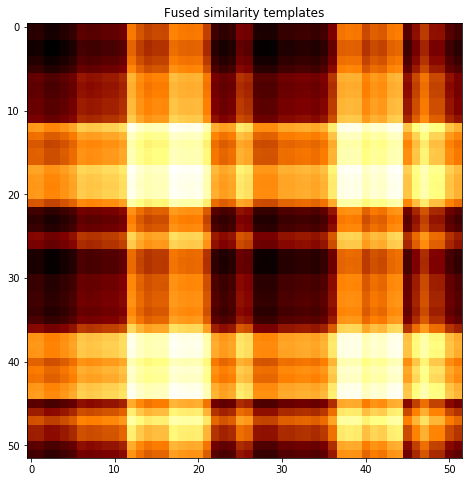

subject 16; gesture 1_1_1


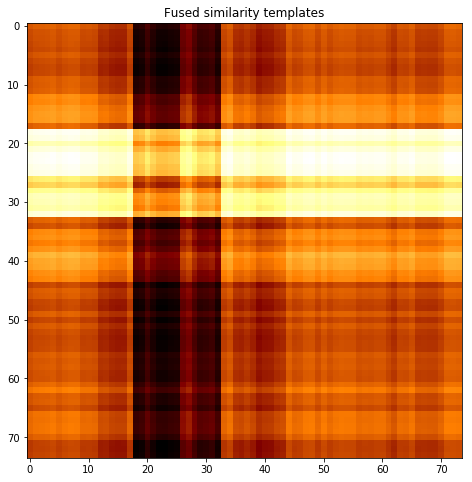

subject 16; gesture 1_0_1


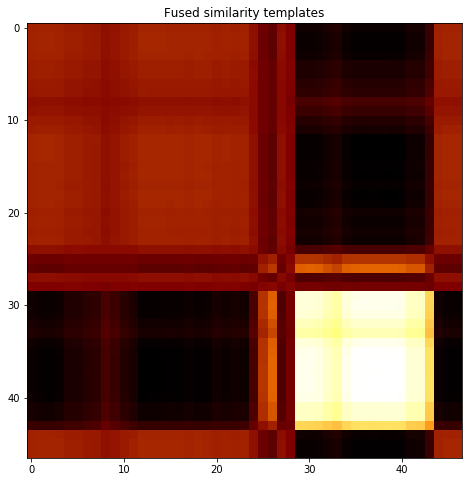

subject 16; gesture 1_0_2


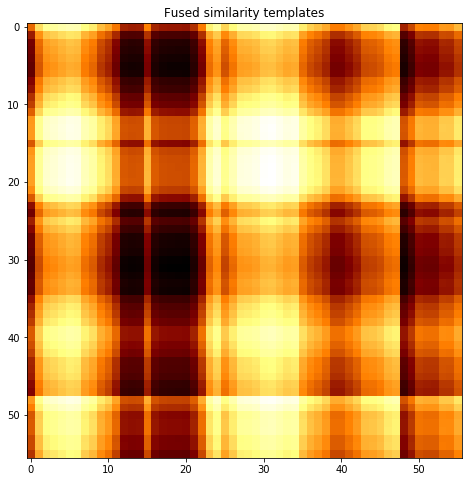

subject 26; gesture 1_1_2


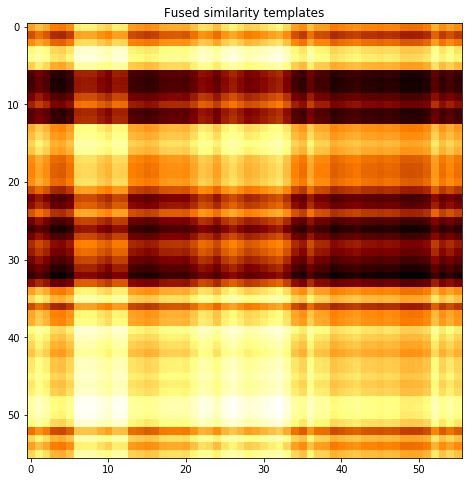

subject 26; gesture 1_1_1


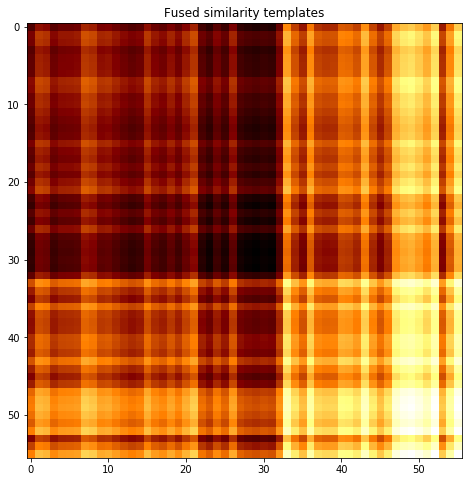

subject 26; gesture 1_0_1


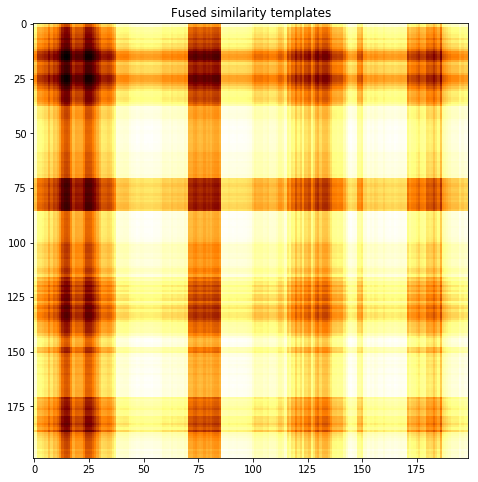

subject 26; gesture 1_0_2


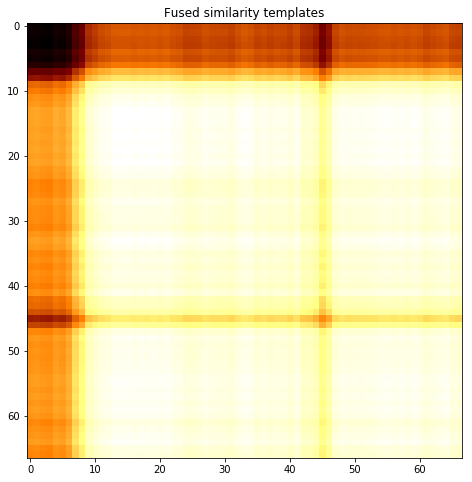

subject 32; gesture 1_1_2


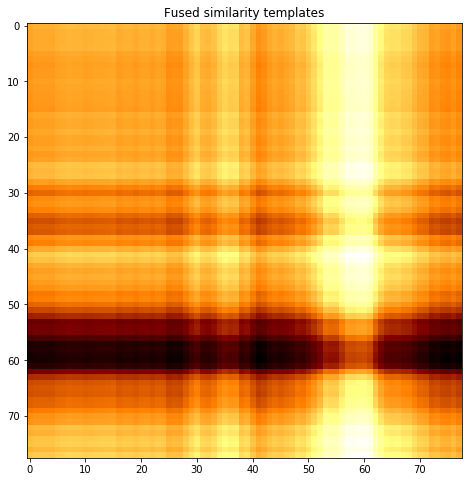

subject 32; gesture 1_1_1


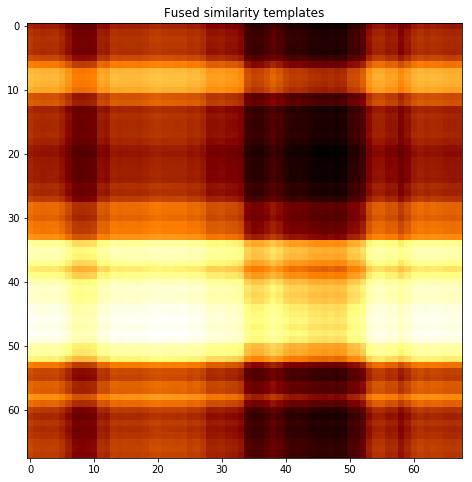

subject 32; gesture 1_0_1


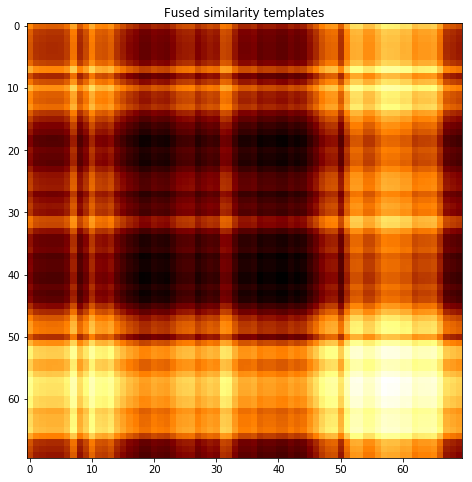

subject 32; gesture 1_0_2


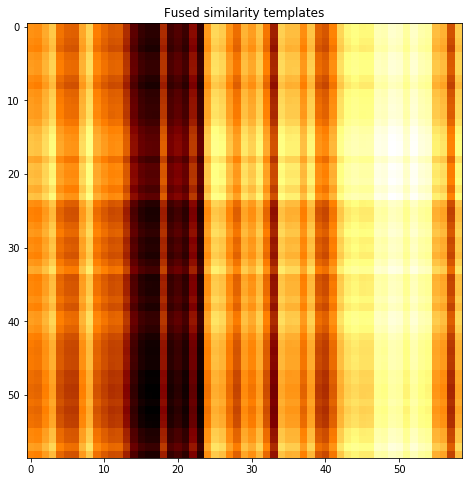

subject 04; gesture 1_1_2


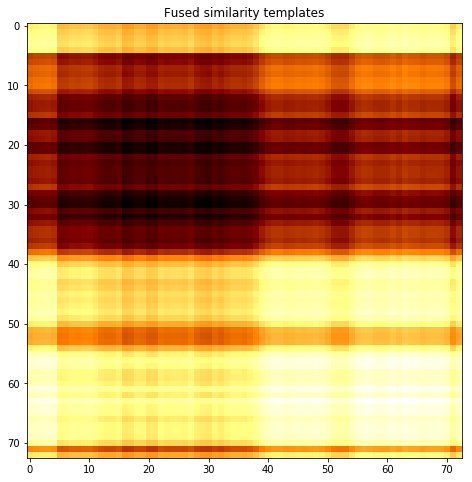

subject 04; gesture 1_1_1


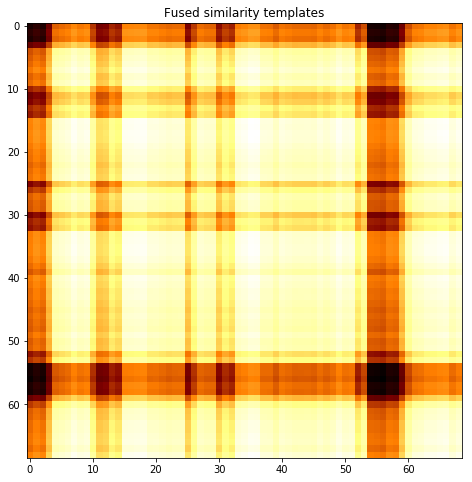

subject 04; gesture 1_0_1


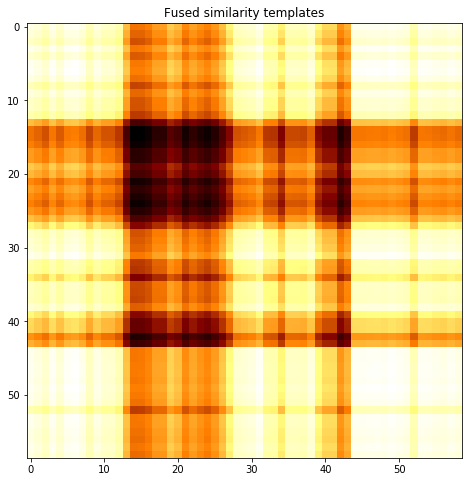

subject 04; gesture 1_0_2


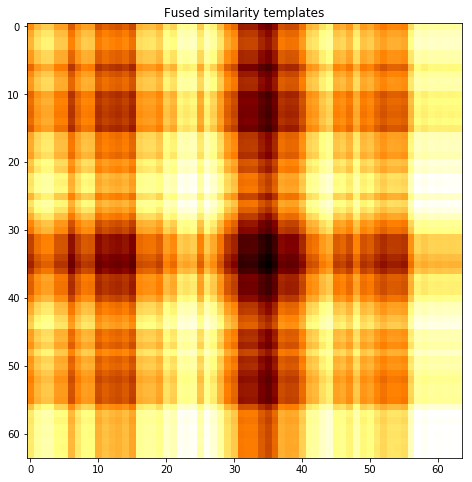

subject 08; gesture 1_1_2


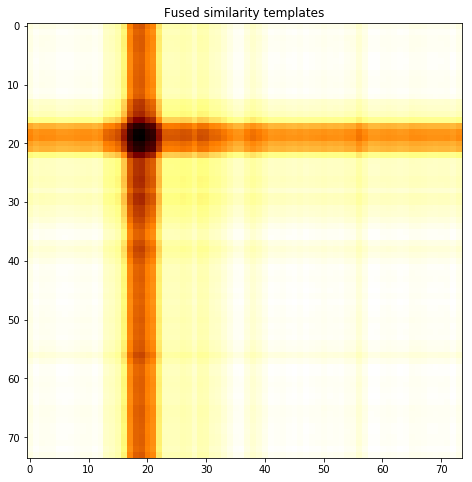

subject 08; gesture 1_1_1


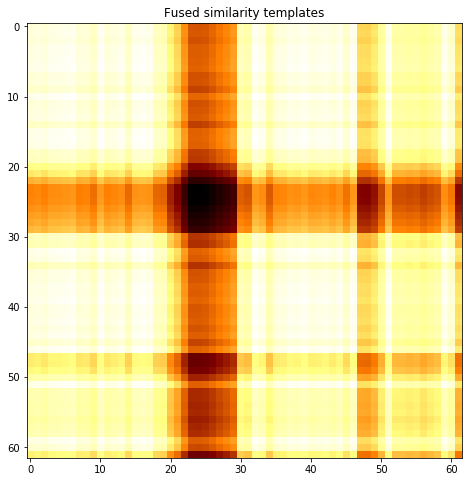

subject 08; gesture 1_0_1


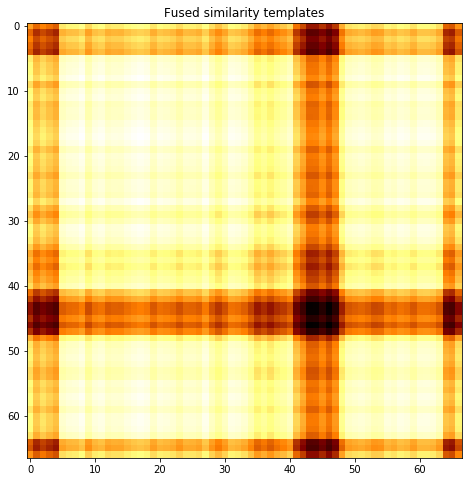

subject 08; gesture 1_0_2


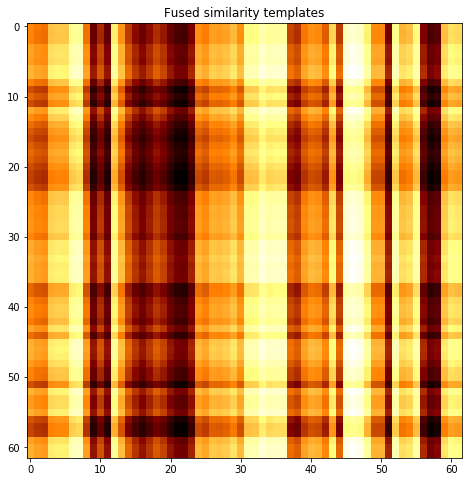

subject 27; gesture 1_1_2


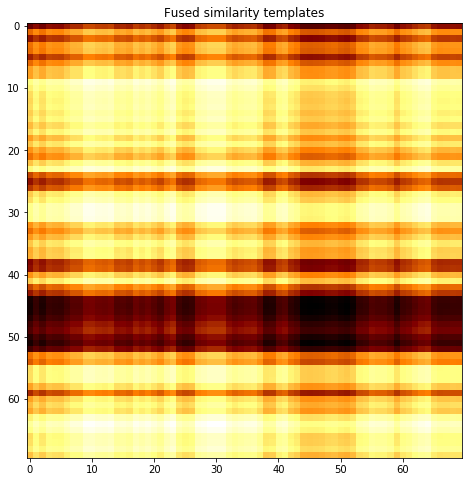

subject 27; gesture 1_1_1


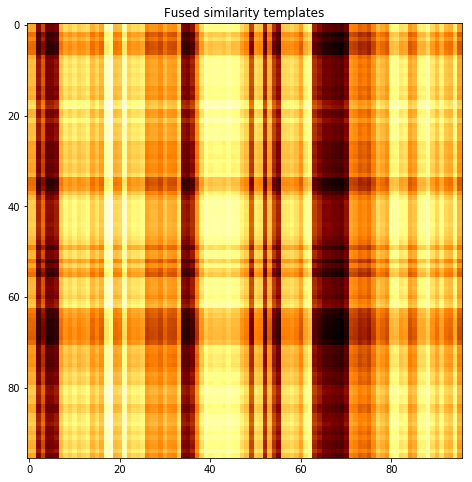

subject 27; gesture 1_0_1


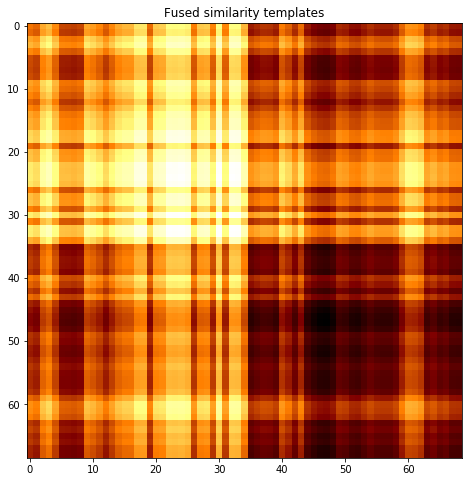

subject 27; gesture 1_0_2


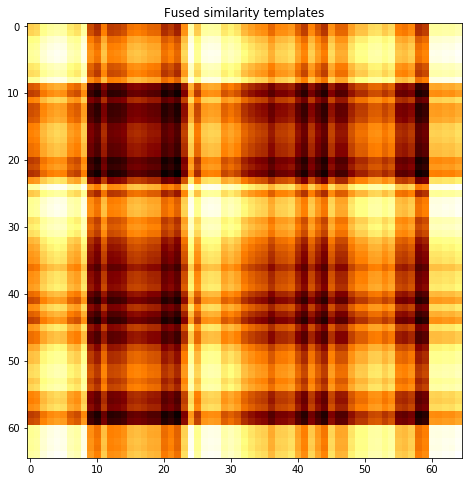

subject 14; gesture 1_1_2


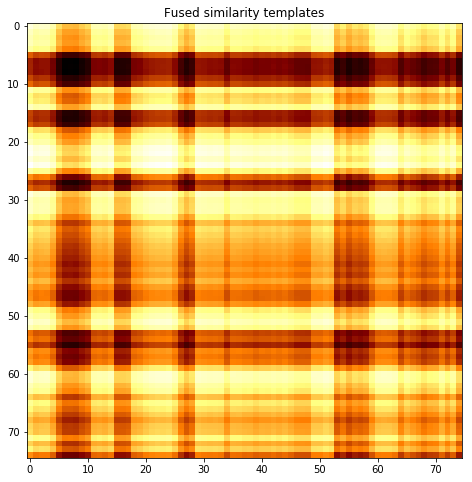

subject 14; gesture 1_1_1


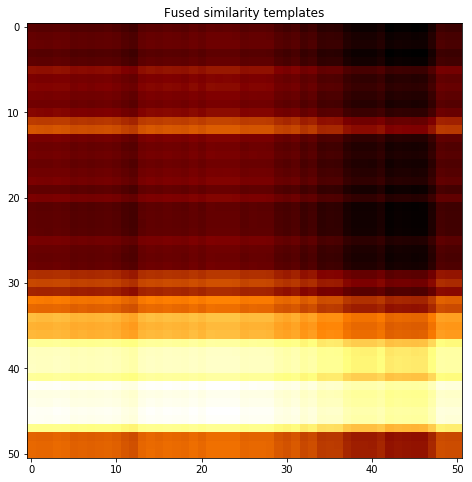

subject 14; gesture 1_0_1


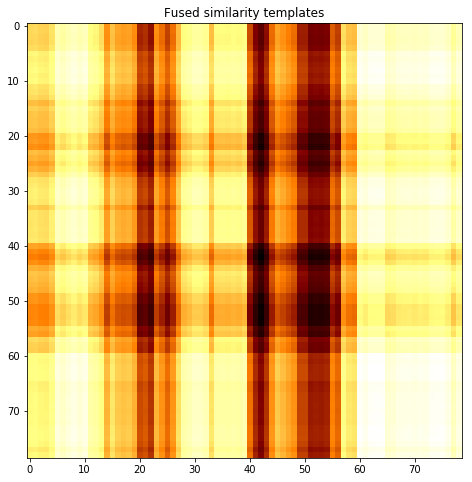

subject 14; gesture 1_0_2


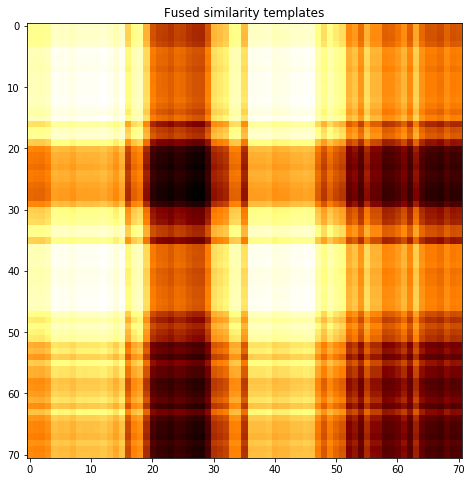

subject 23; gesture 1_1_2


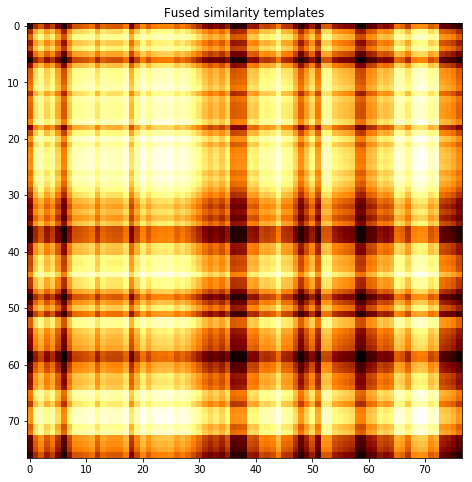

subject 23; gesture 1_1_1


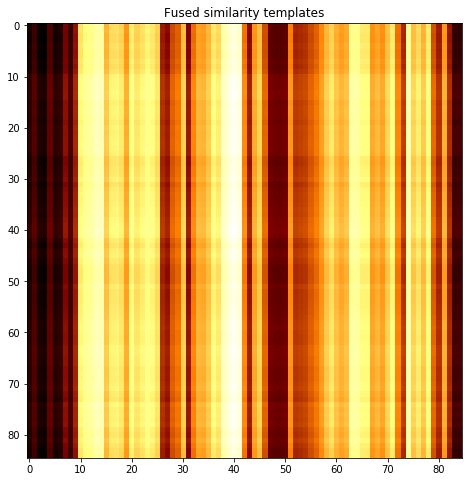

subject 23; gesture 1_0_1


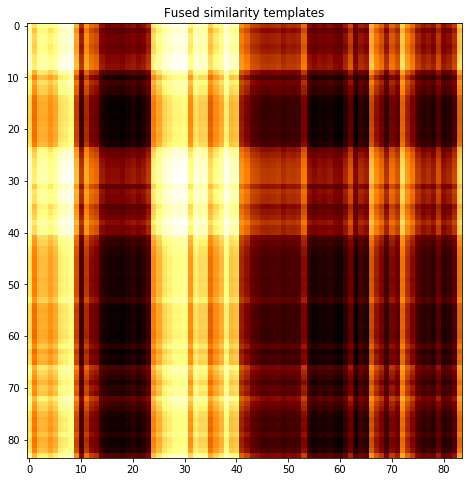

subject 23; gesture 1_0_2


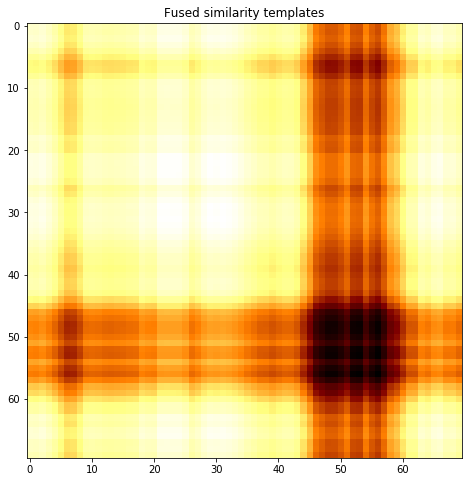

subject 25; gesture 1_1_2


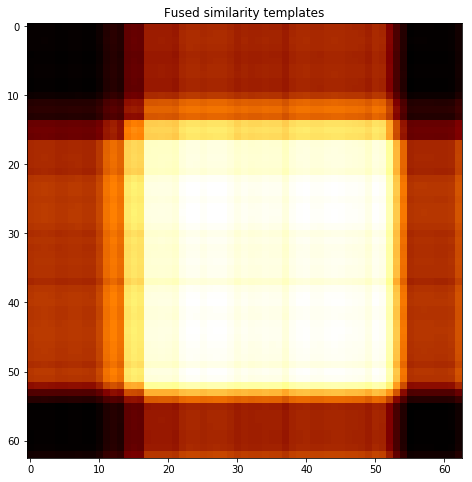

subject 25; gesture 1_1_1


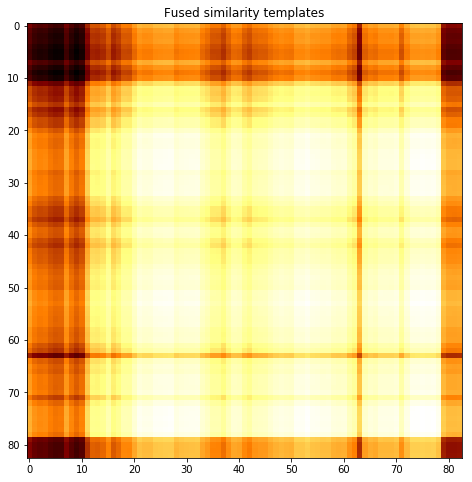

subject 25; gesture 1_0_1


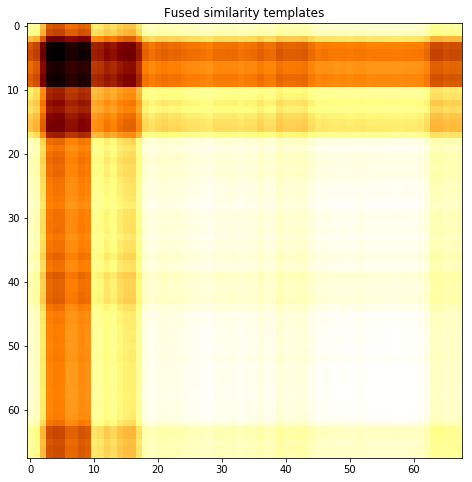

subject 25; gesture 1_0_2


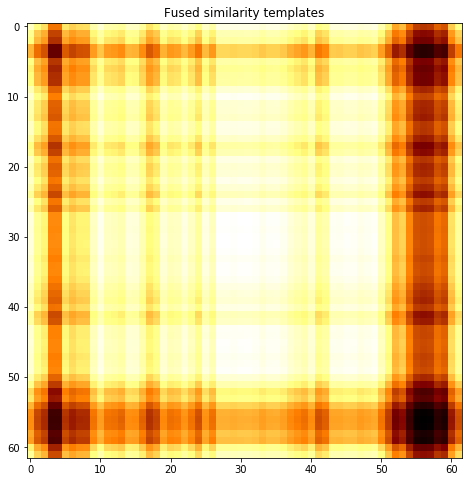

subject 18; gesture 1_1_2


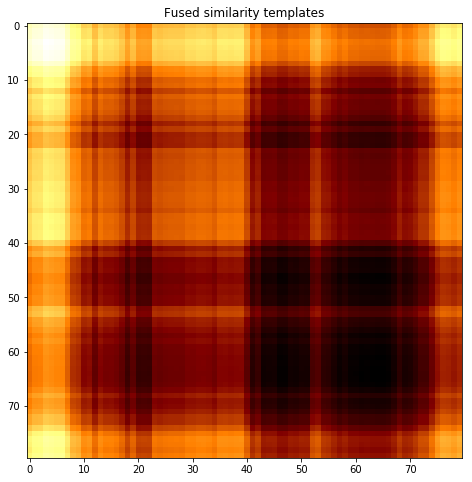

subject 18; gesture 1_1_1


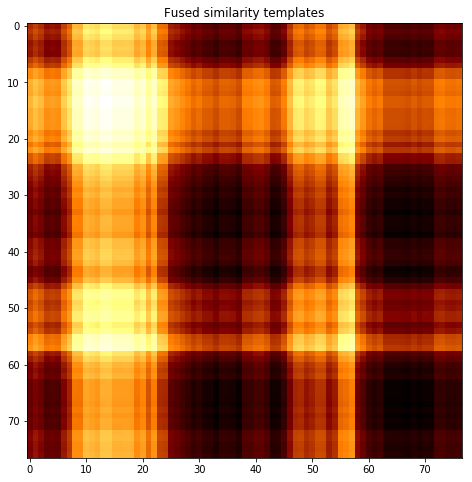

subject 18; gesture 1_0_1


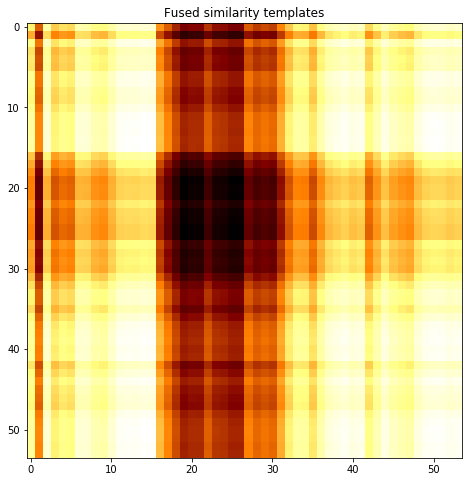

subject 18; gesture 1_0_2


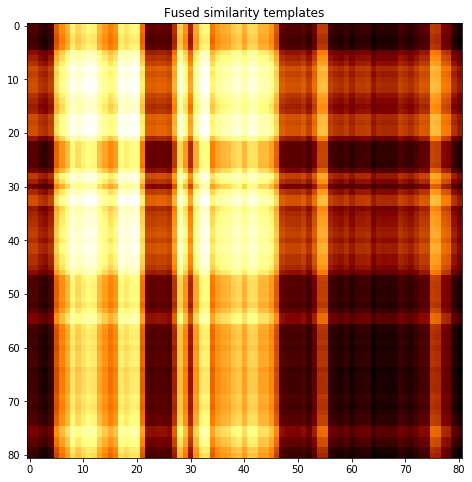

subject 29; gesture 1_1_2


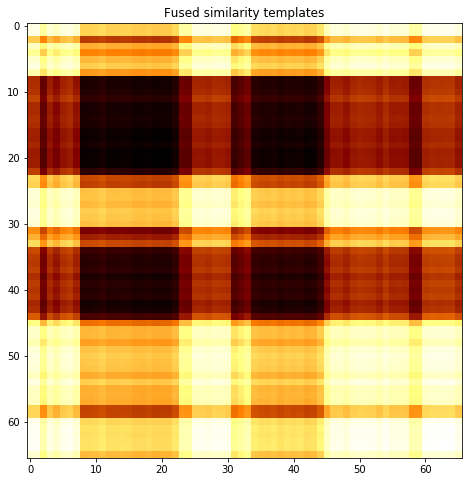

subject 29; gesture 1_1_1


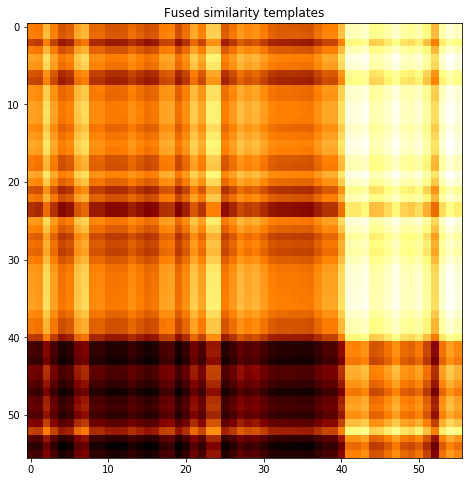

subject 29; gesture 1_0_1


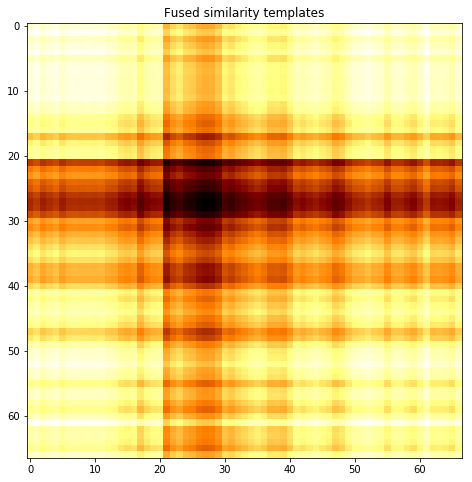

subject 29; gesture 1_0_2


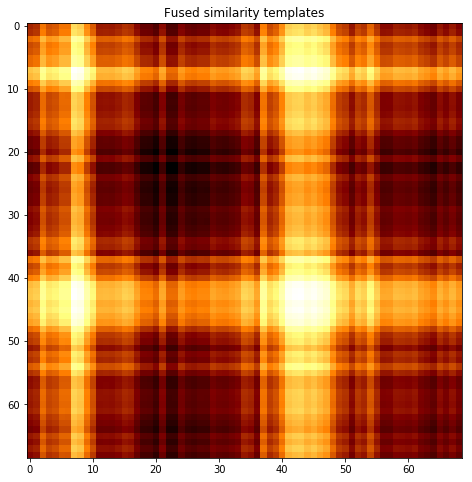

subject 15; gesture 1_1_2


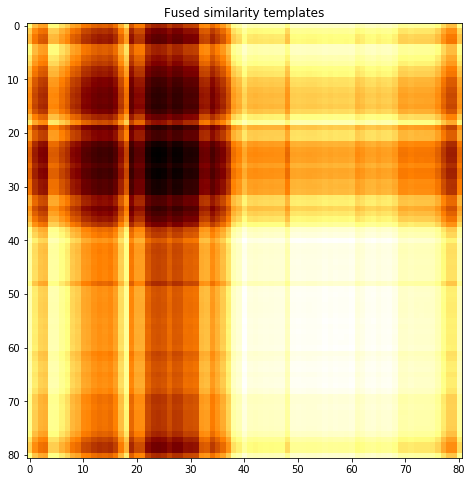

subject 15; gesture 1_1_1


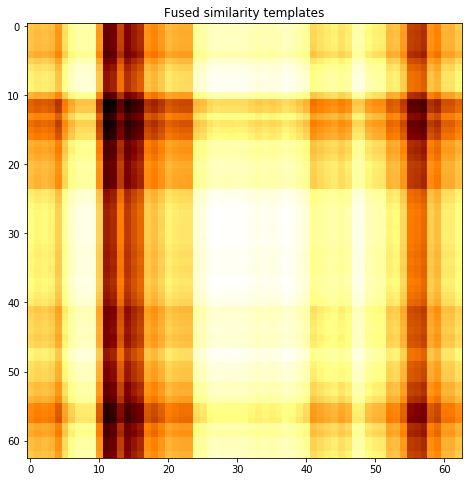

subject 15; gesture 1_0_1


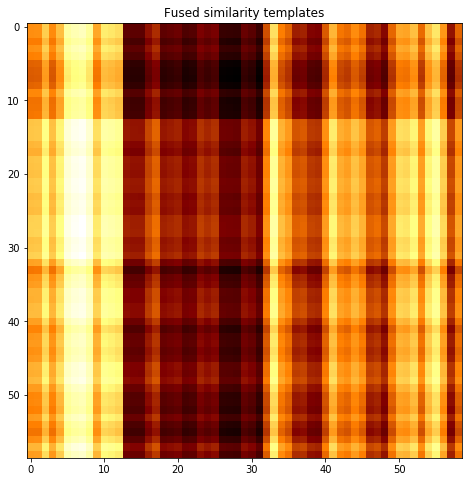

subject 15; gesture 1_0_2


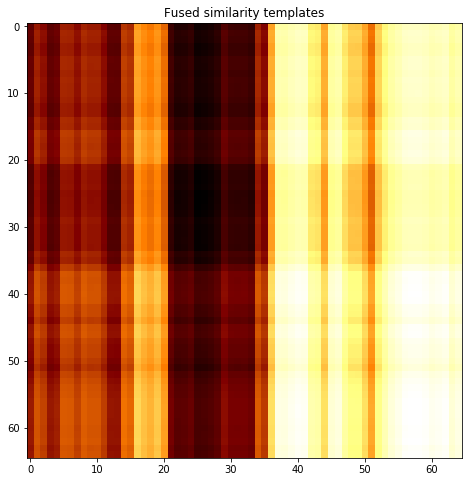

subject 28; gesture 1_1_2


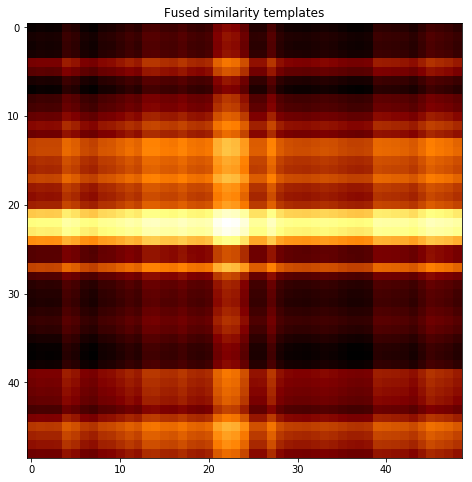

subject 28; gesture 1_1_1


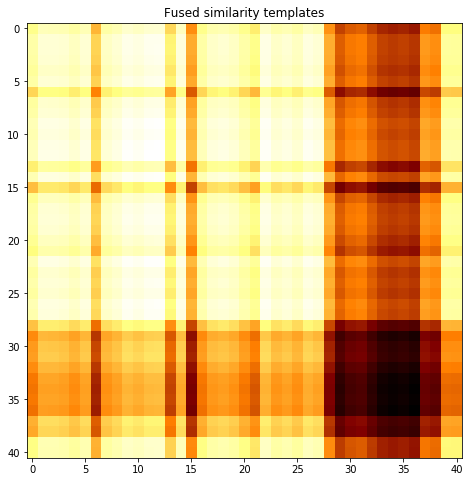

subject 28; gesture 1_0_1


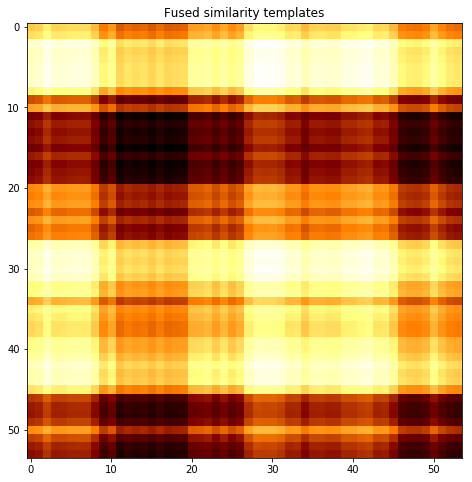

subject 28; gesture 1_0_2


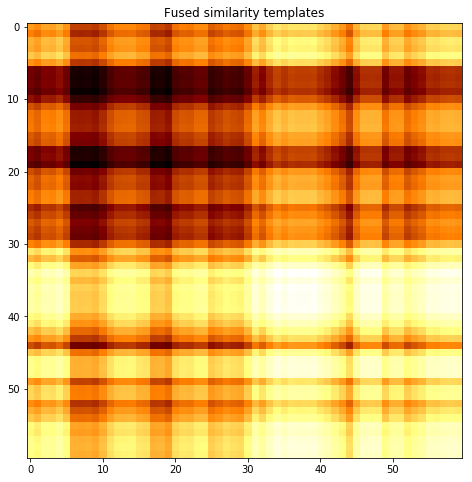

subject 12; gesture 1_1_2


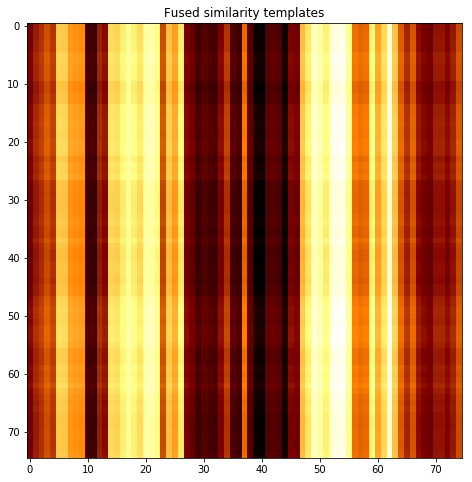

subject 12; gesture 1_1_1


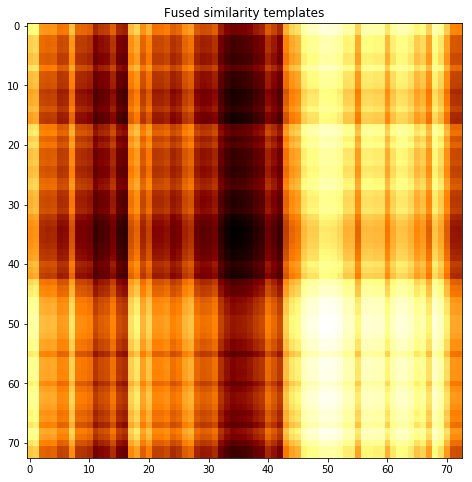

subject 12; gesture 1_0_1


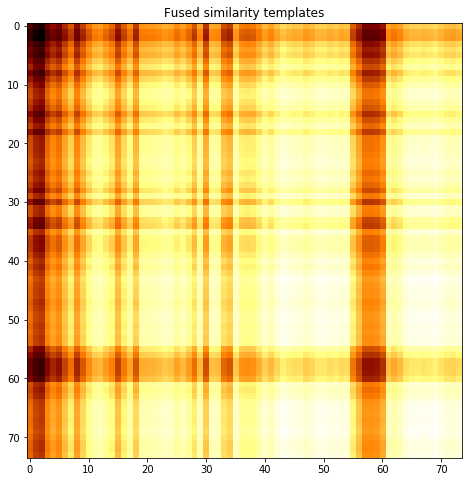

subject 12; gesture 1_0_2


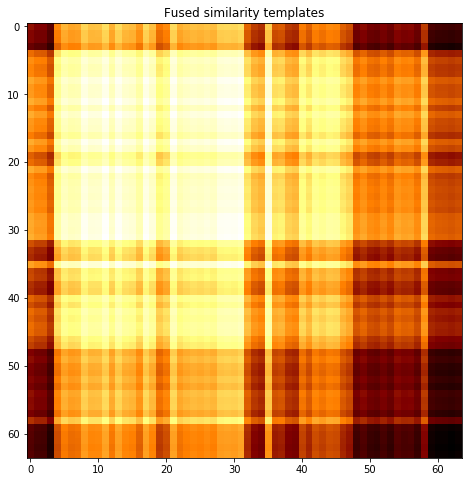

subject 19; gesture 1_1_2


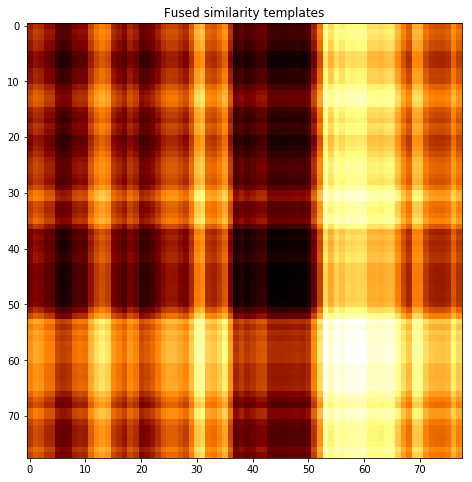

subject 19; gesture 1_1_1


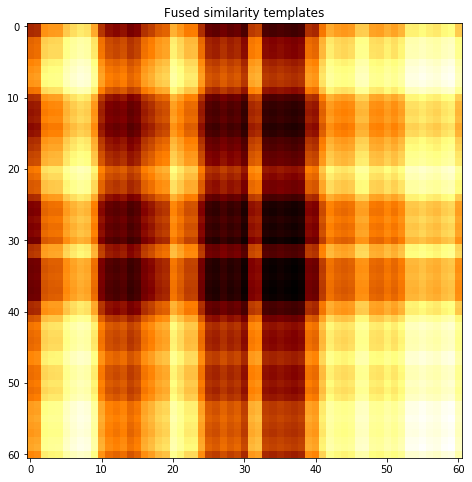

subject 19; gesture 1_0_1


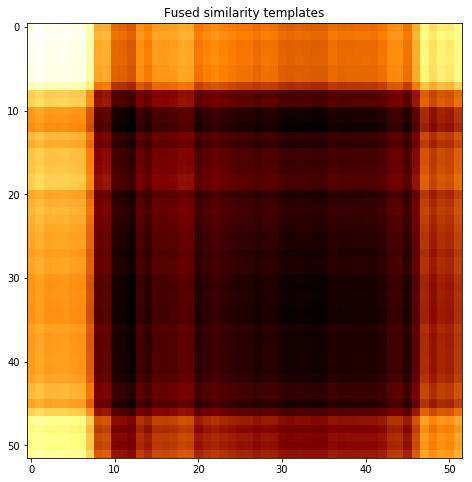

subject 19; gesture 1_0_2


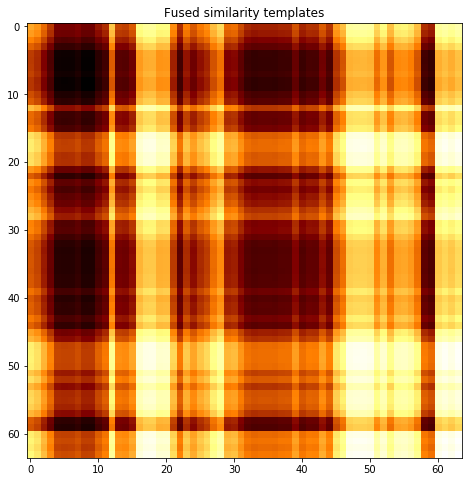

subject 07; gesture 1_1_2


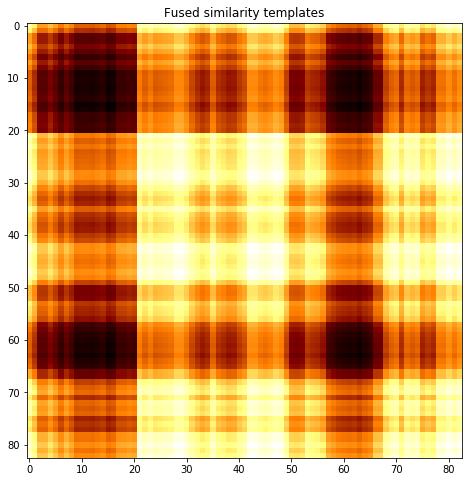

subject 07; gesture 1_1_1


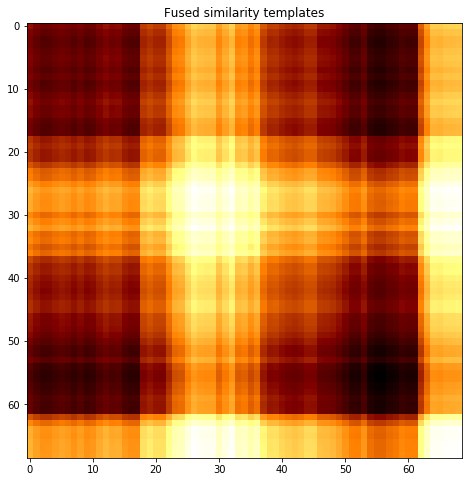

subject 07; gesture 1_0_1


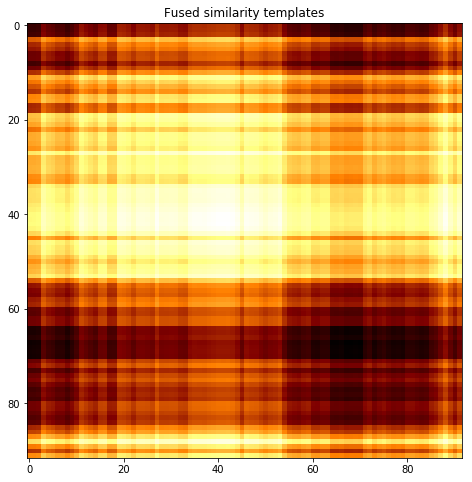

subject 07; gesture 1_0_2


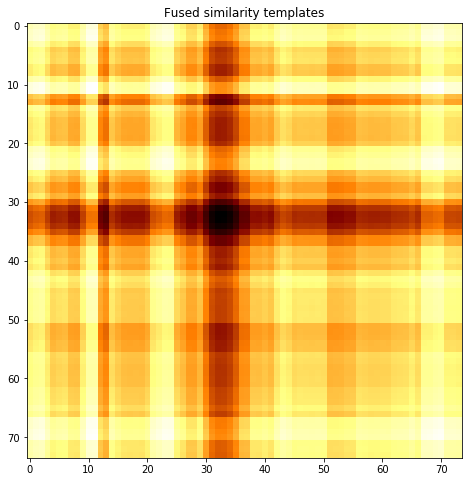

subject 20; gesture 1_1_2


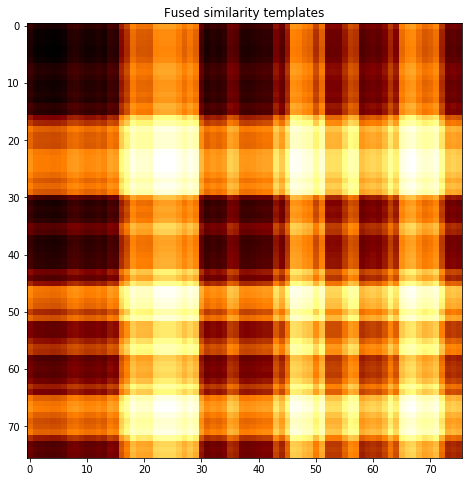

subject 20; gesture 1_1_1


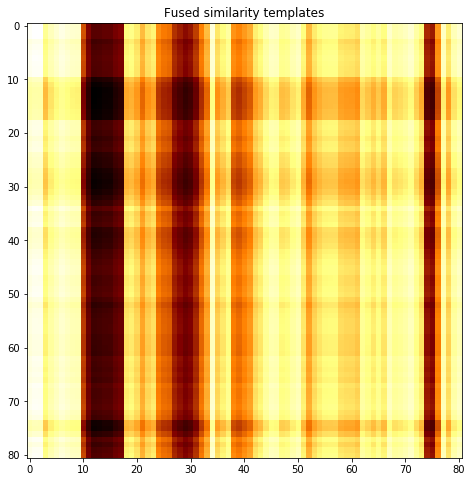

subject 20; gesture 1_0_1


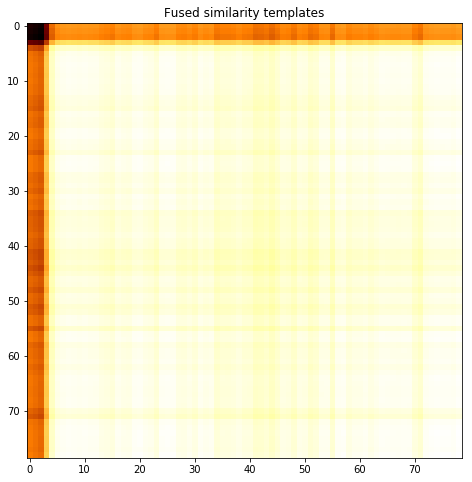

subject 20; gesture 1_0_2


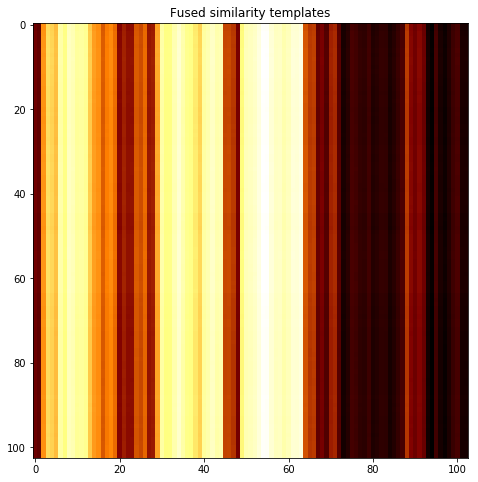

subject 31; gesture 1_1_2


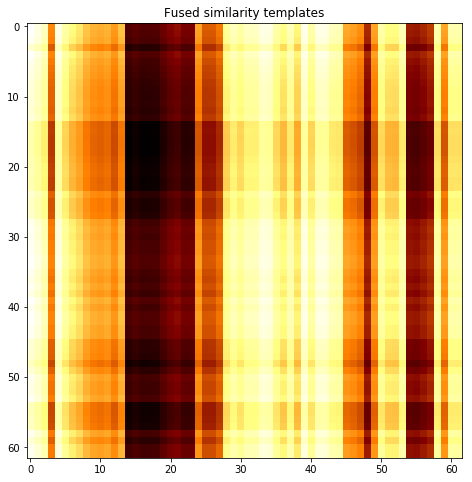

subject 31; gesture 1_1_1


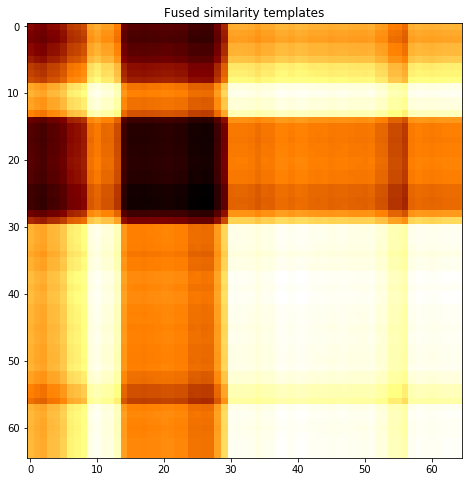

subject 31; gesture 1_0_1


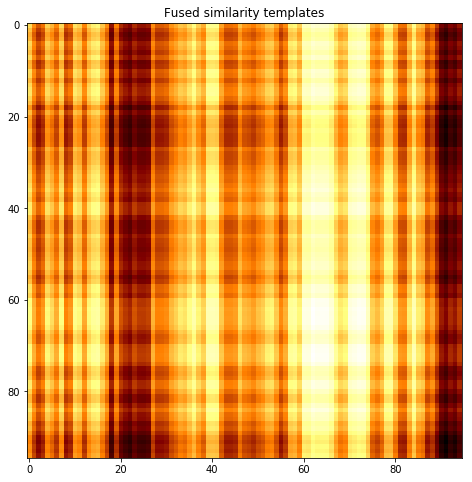

subject 31; gesture 1_0_2


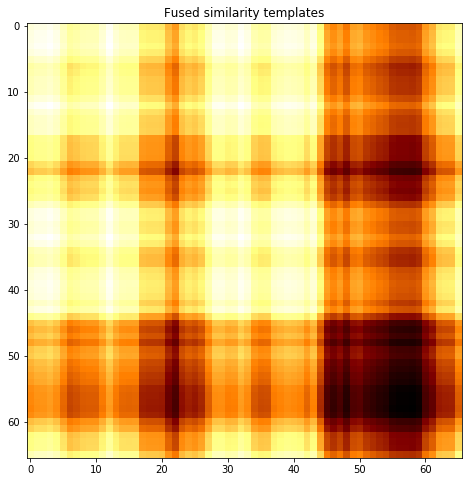

subject 13; gesture 1_1_2


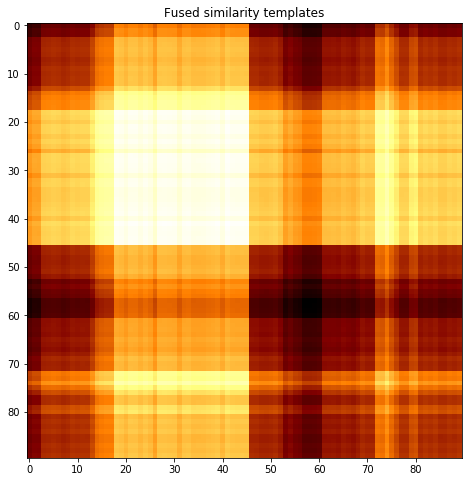

subject 13; gesture 1_1_1


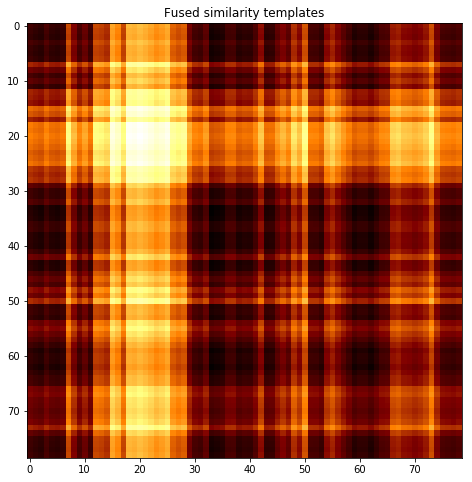

subject 13; gesture 1_0_1


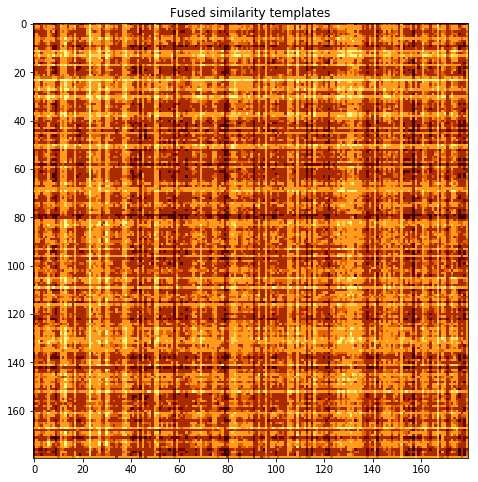

subject 13; gesture 1_0_2


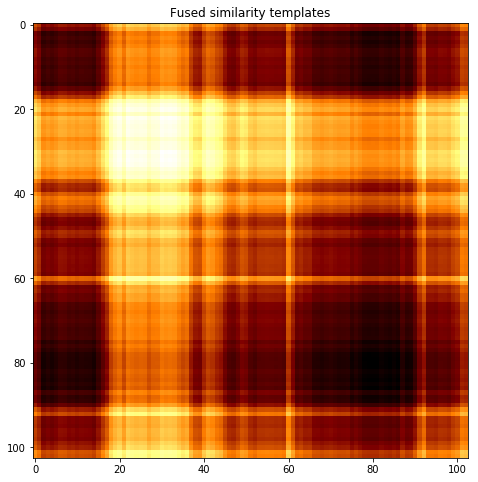

subject 36; gesture 1_1_2


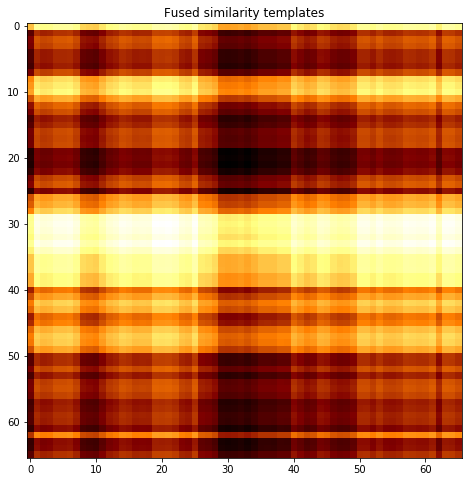

subject 36; gesture 1_1_1


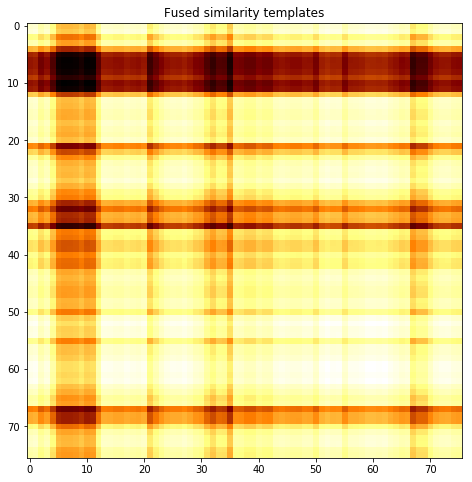

subject 36; gesture 1_0_1


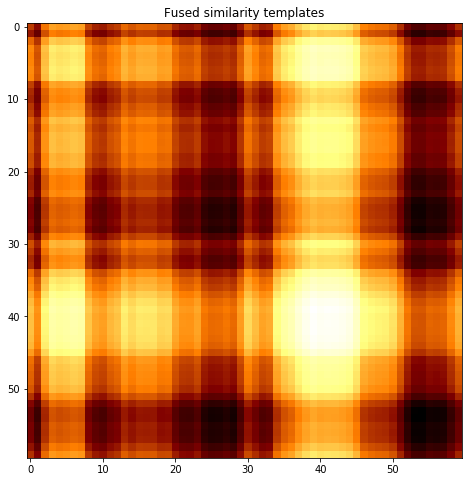

subject 36; gesture 1_0_2


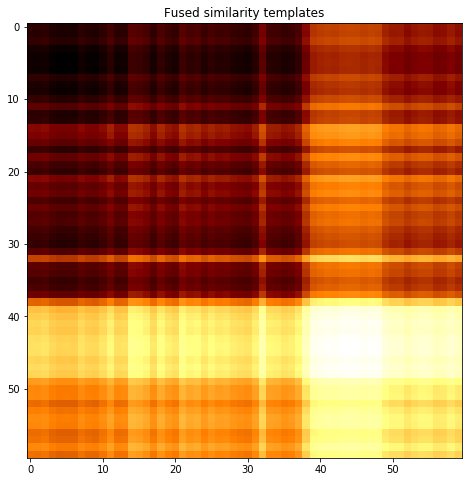

subject 24; gesture 1_1_2


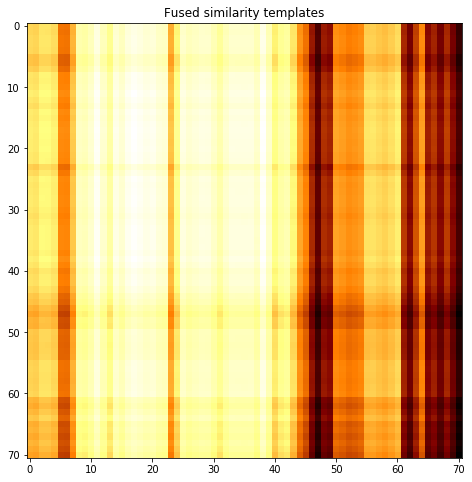

subject 24; gesture 1_1_1


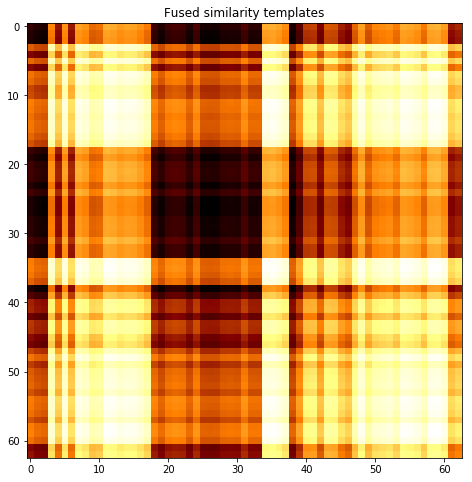

subject 24; gesture 1_0_1


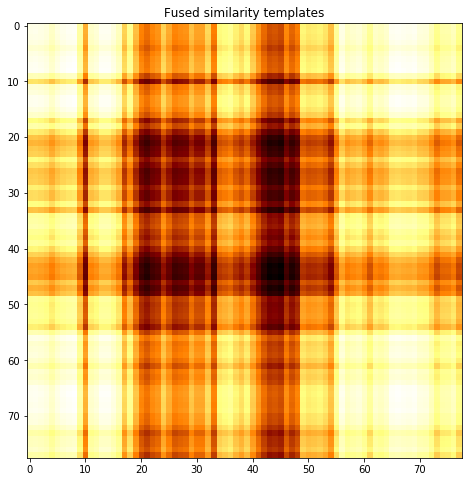

subject 24; gesture 1_0_2


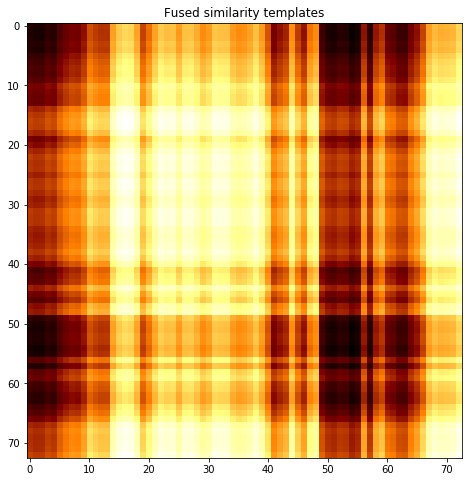

subject 33; gesture 1_1_2


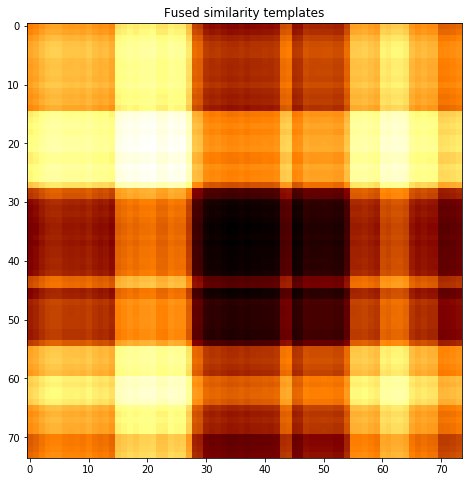

subject 33; gesture 1_1_1


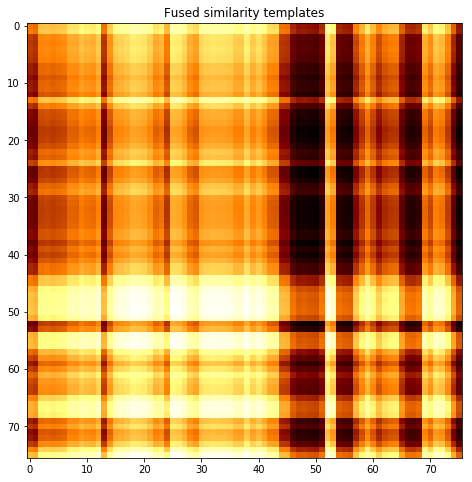

subject 33; gesture 1_0_1


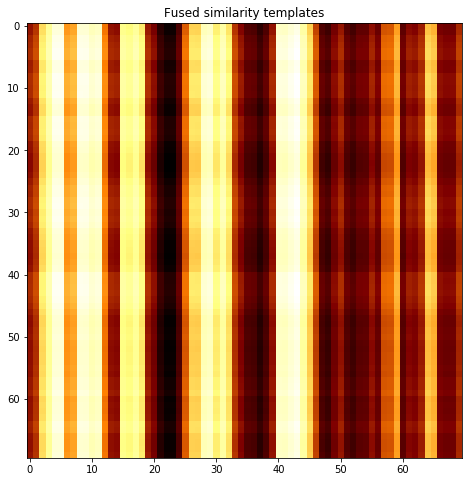

subject 33; gesture 1_0_2


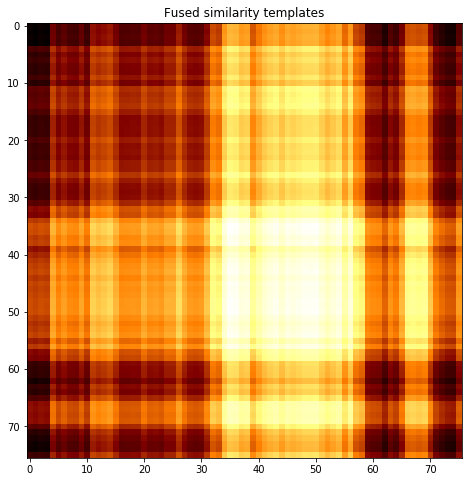

subject 11; gesture 1_1_2


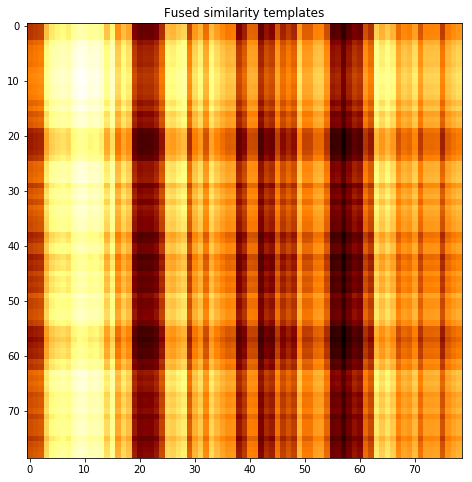

subject 11; gesture 1_1_1


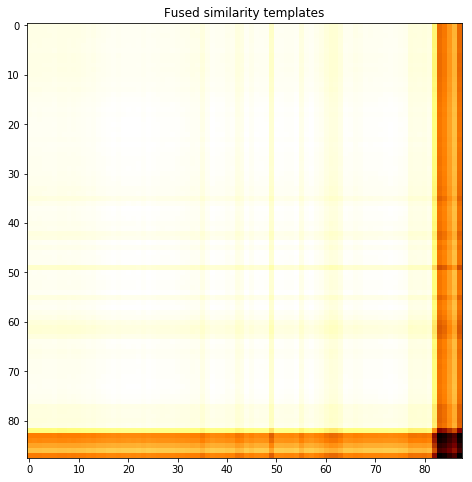

subject 11; gesture 1_0_1


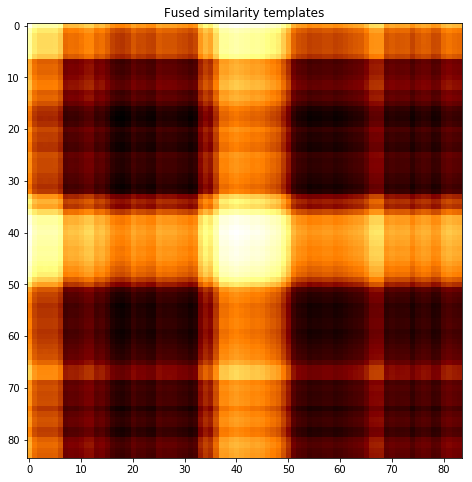

subject 11; gesture 1_0_2


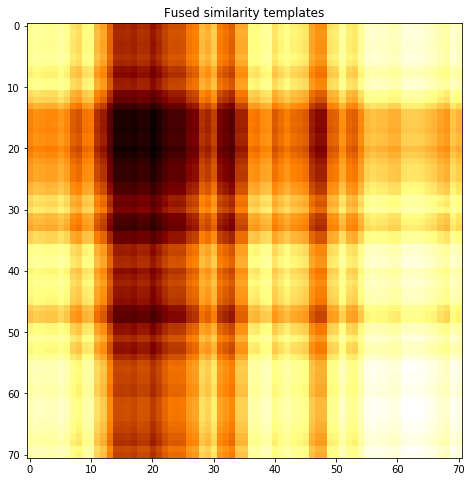

subject 35; gesture 1_1_2


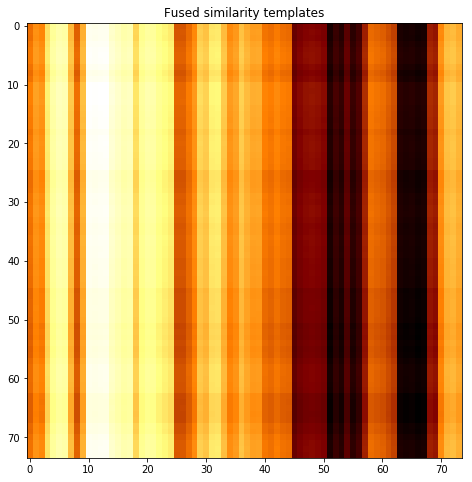

subject 35; gesture 1_1_1


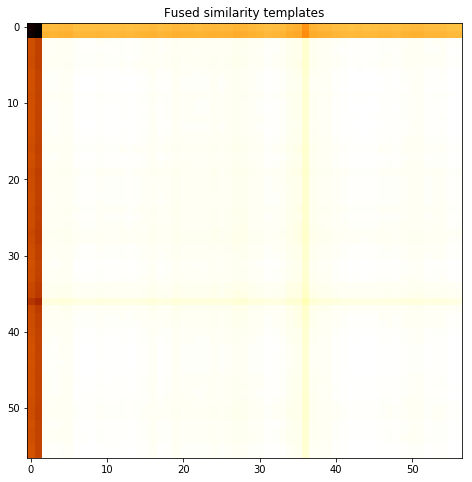

subject 35; gesture 1_0_1


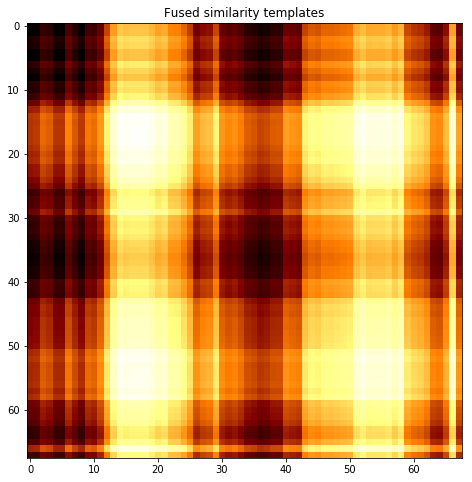

subject 35; gesture 1_0_2


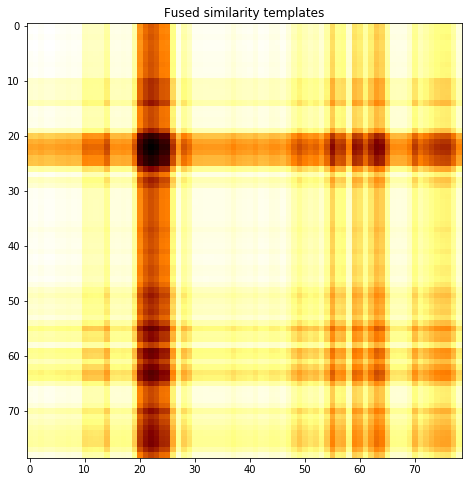

subject 22; gesture 1_1_2


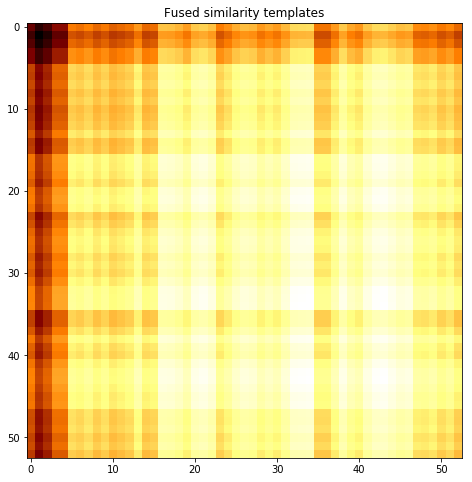

subject 22; gesture 1_1_1


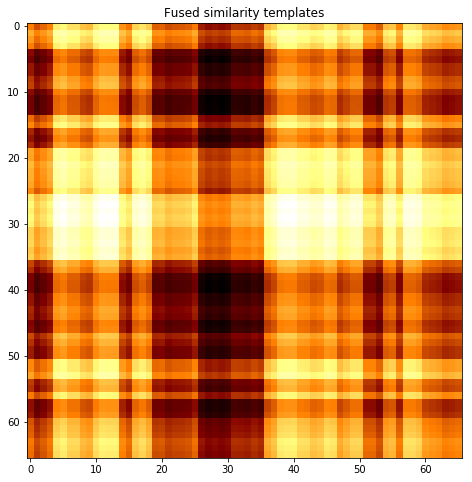

subject 22; gesture 1_0_1


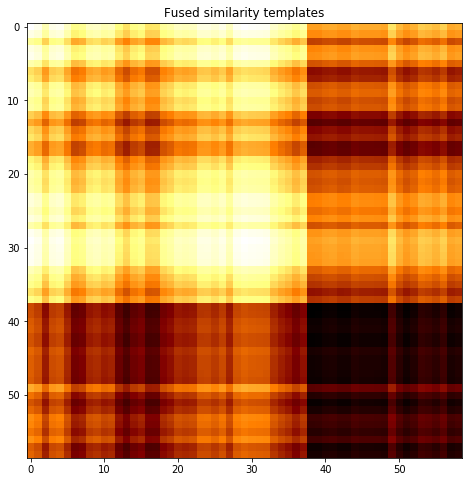

subject 22; gesture 1_0_2


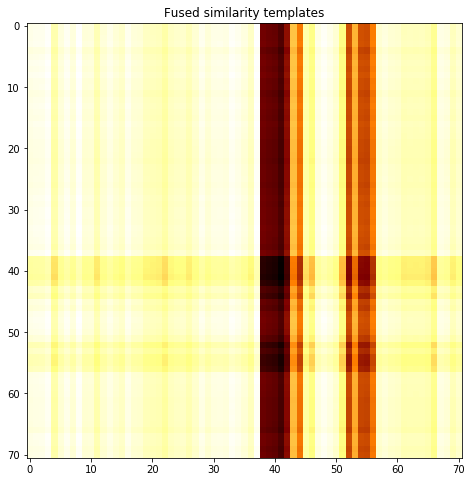

subject 34; gesture 1_1_2


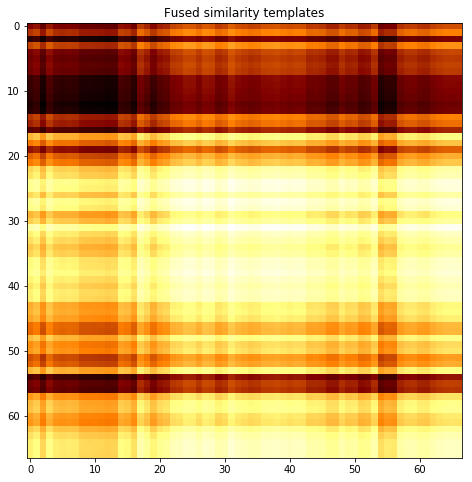

subject 34; gesture 1_1_1


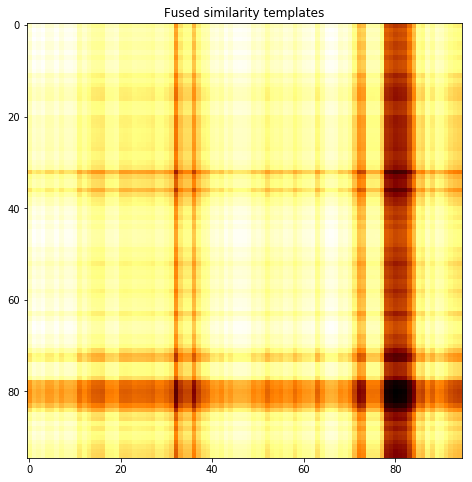

subject 34; gesture 1_0_1


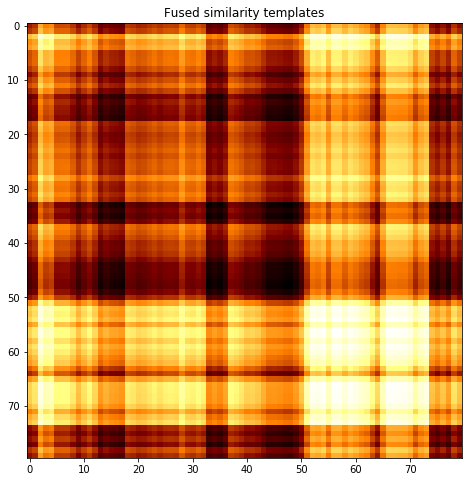

subject 34; gesture 1_0_2


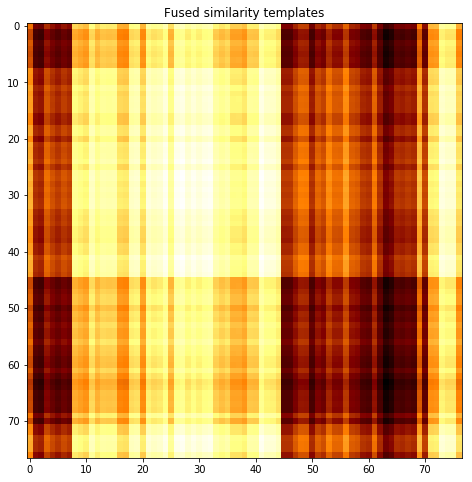

subject 10; gesture 1_1_2


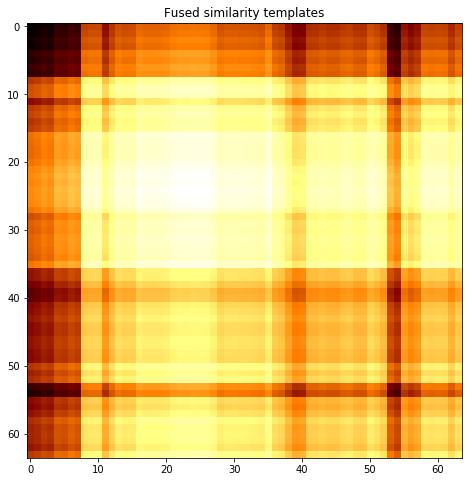

subject 10; gesture 1_1_1


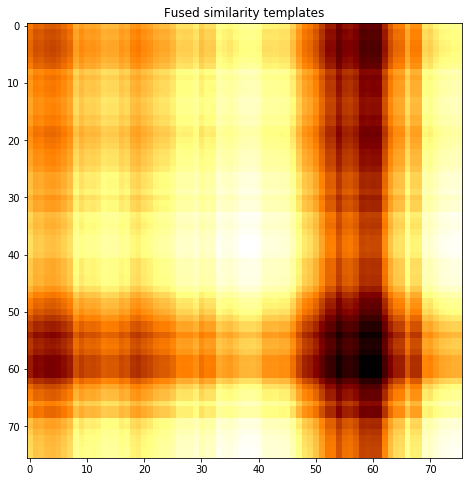

subject 10; gesture 1_0_1


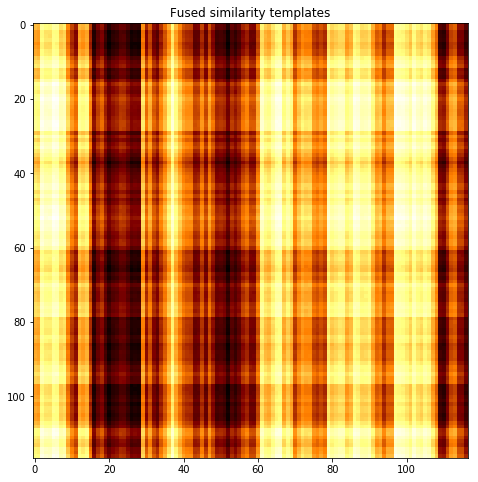

subject 10; gesture 1_0_2


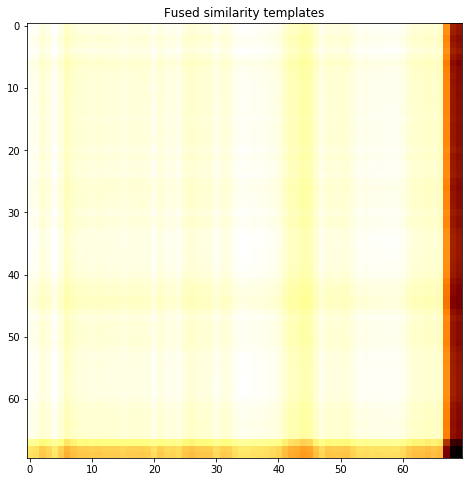

subject 02; gesture 1_1_2


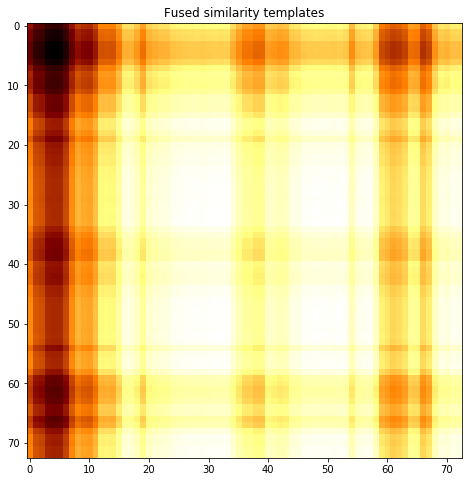

subject 02; gesture 1_1_1


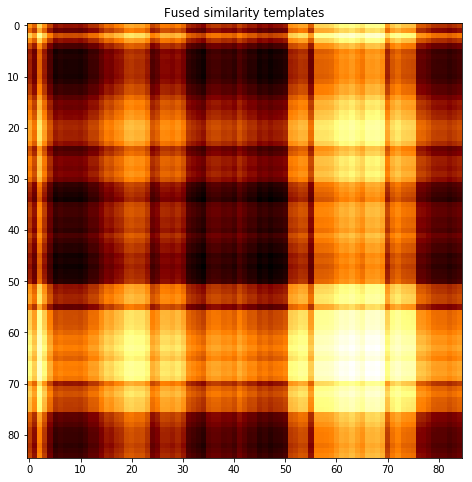

subject 02; gesture 1_0_1


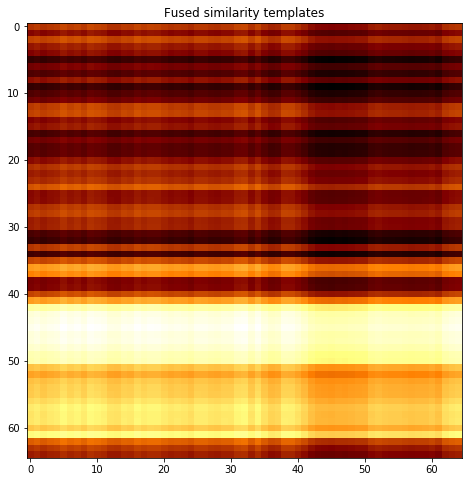

subject 02; gesture 1_0_2


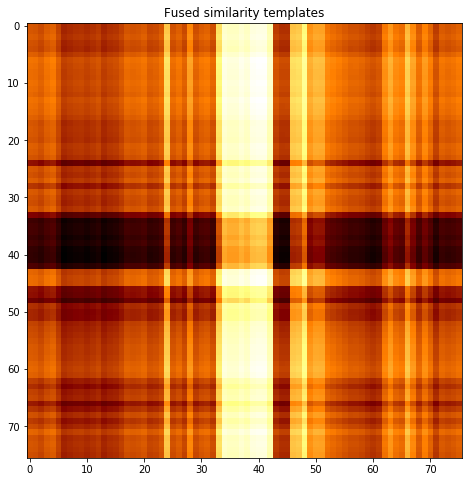

In [4]:
g1_dict_antag = {}
for s, gdict in dc.data_set_smooth.items():
    g1_dict_antag[s] = {}
    for g, a in gdict.items():
        snf = SNF(dc.data_set_smooth[s][g][:, :-1], k=0.2)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion(iters=20)
        print(f"subject {s}; gesture {g}")
        snf.plot_template()
        # save template to dict
        g1_dict_antag[s][g] = snf.fused_similarity_template

---

static w/ 25 iters

subject 05; gesture 1_0_1

subject 23; gesture 1_1_2

subject 25; gesture 1_0_1

subject 29; gesture 1_1_1

subject 12; gesture 1_1_2

subject 31; gesture 1_1_2

subject 24; gesture 1_1_1

Problem cases w/ 20 iters:

subject 21; gesture 1_0_1

subject 21; gesture 1_1_2

subject 01; gesture 1_1_1

subject 01; gesture 1_0_2

---

Goal: find differences between "static-y" fused SSMs and "smooth" fused SSMs


Observations:
 - SSMs with a lot of static have very low st. dev.; All elements very similar.
 - SSMs with higher st. dev. have more obvious/ bold features.
 - some exceptions exist (e.g. subject 02 gesture 1_1_1 - still a lot of static but a bold feature exists)

---
Can I do PCA for all of these and get similar results?

subject 30; gesture 1_1_2; avg 0.011669525503254589; sd 5.129636172463402e-11
subject 30; gesture 1_1_2; PoV: 0.9999999999999913


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


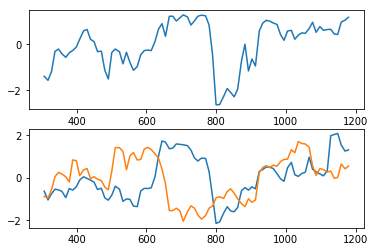

subject 30; gesture 1_1_1; avg 0.011890816959313748; sd 4.014345946772882e-06
subject 30; gesture 1_1_1; PoV: 0.9999961132330685


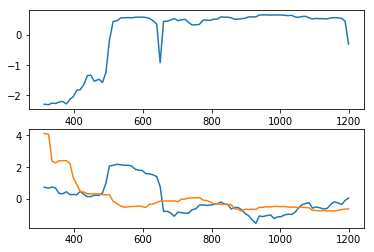

subject 30; gesture 1_0_1; avg 0.010767303134327812; sd 3.922387350020465e-07
subject 30; gesture 1_0_1; PoV: 0.9999999020137215


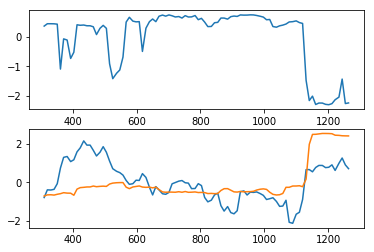

subject 30; gesture 1_0_2; avg 0.01288842231882595; sd 1.303669063604187e-14
subject 30; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


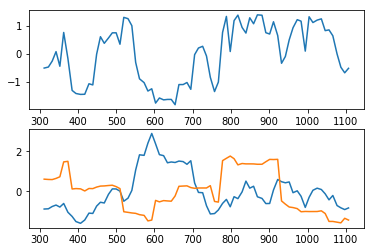

subject 06; gesture 1_1_2; avg 0.027350809561110512; sd 2.2359604816089275e-05
subject 06; gesture 1_1_2; PoV: 0.9999868812133867


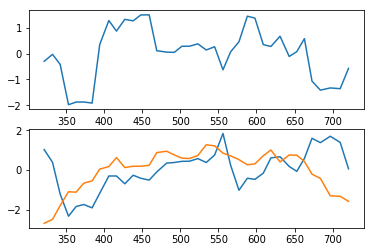

subject 06; gesture 1_1_1; avg 0.013572204658889324; sd 1.5908726621654381e-10
subject 06; gesture 1_1_1; PoV: 0.9999999999999342


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


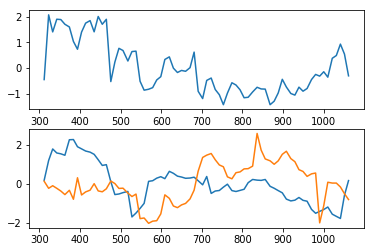

subject 06; gesture 1_0_1; avg 0.014992584086056835; sd 2.1999044410078857e-08
subject 06; gesture 1_0_1; PoV: 0.9999999968576795


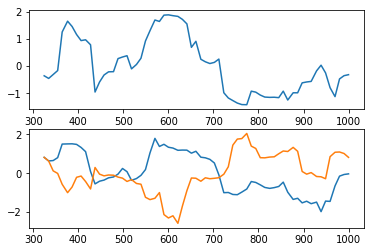

subject 06; gesture 1_0_2; avg 0.018566255477206927; sd 2.0072137111356312e-14
subject 06; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


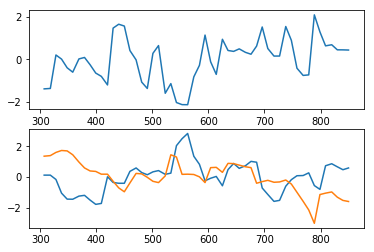

subject 09; gesture 1_1_2; avg 0.013668260191148444; sd 1.8410976980340951e-09
subject 09; gesture 1_1_2; PoV: 0.9999999999673277


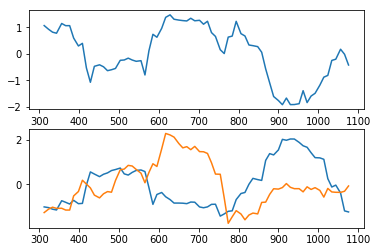

subject 09; gesture 1_1_1; avg 0.01530911637347356; sd 1.8061786608584914e-09
subject 09; gesture 1_1_1; PoV: 0.99999999999716


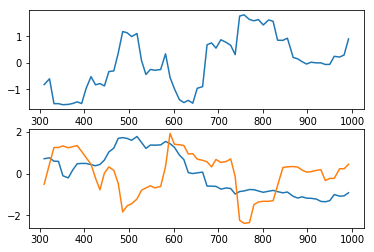

subject 09; gesture 1_0_1; avg 0.012291892445068831; sd 4.31693283840153e-05
subject 09; gesture 1_0_1; PoV: 0.9998753724174706


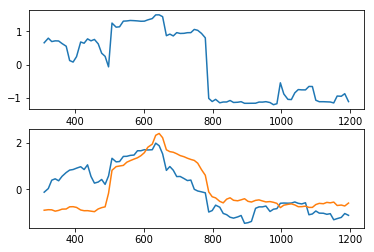

subject 09; gesture 1_0_2; avg 0.014386234445358007; sd 2.5871817194004346e-15
subject 09; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


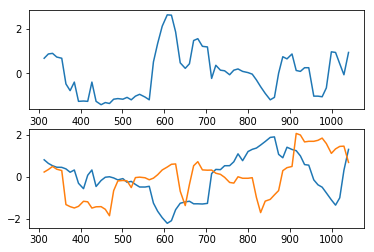

subject 03; gesture 1_1_2; avg 0.013154456720759412; sd 1.6513113485326356e-12
subject 03; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


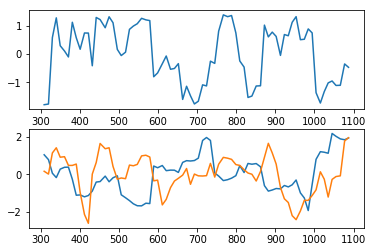

subject 03; gesture 1_1_1; avg 0.018339921790224426; sd 4.741933360588105e-12
subject 03; gesture 1_1_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


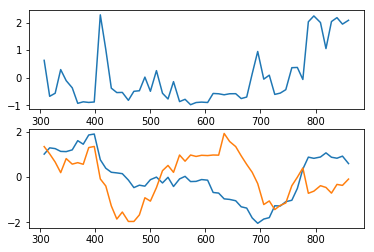

subject 03; gesture 1_0_1; avg 0.014211915173446735; sd 2.493308248465702e-13
subject 03; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


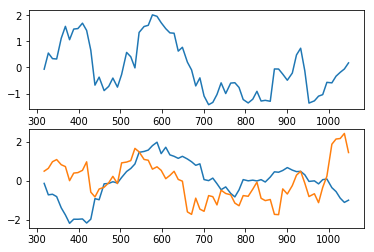

subject 03; gesture 1_0_2; avg 0.015918197646476517; sd 8.913009385352948e-10
subject 03; gesture 1_0_2; PoV: 0.9999999999982707


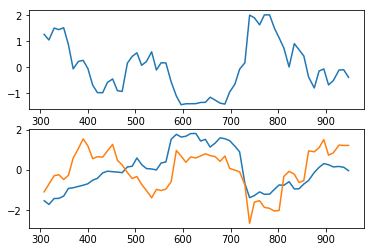

subject 05; gesture 1_1_2; avg 0.018387616416586074; sd 3.3535581266093812e-06
subject 05; gesture 1_1_2; PoV: 0.9999991733826408


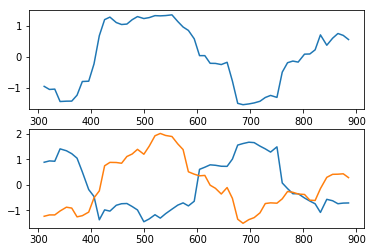

subject 05; gesture 1_1_1; avg 0.017895837771247352; sd 2.6595394229798567e-10
subject 05; gesture 1_1_1; PoV: 0.9999999999993209


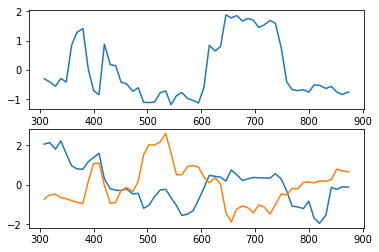

subject 05; gesture 1_0_1; avg 0.011420935595835513; sd 4.3782076373002165e-12
subject 05; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


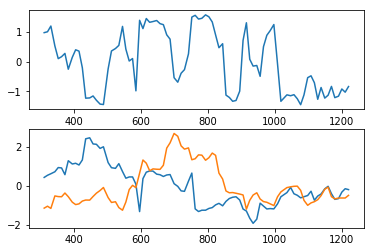

subject 05; gesture 1_0_2; avg 0.014923937913707865; sd 2.2067184593450166e-08
subject 05; gesture 1_0_2; PoV: 0.999999999885214


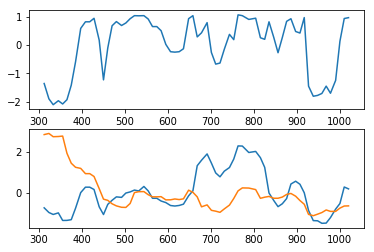

subject 21; gesture 1_1_2; avg 0.014042642178651248; sd 8.779843090798005e-08
subject 21; gesture 1_1_2; PoV: 0.9999999987980602


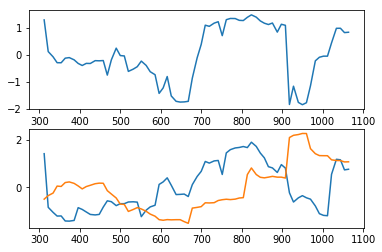

subject 21; gesture 1_1_1; avg 0.019033012904811835; sd 0.002059820276531268
subject 21; gesture 1_1_1; PoV: 0.9751212869522254


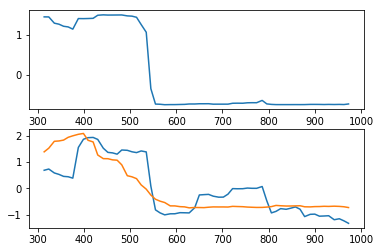

subject 21; gesture 1_0_1; avg 0.01668092819466656; sd 2.314999398880099e-12
subject 21; gesture 1_0_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


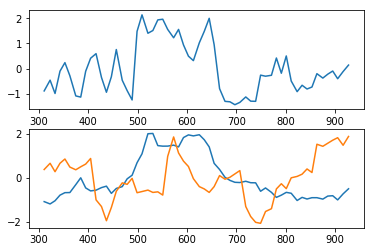

subject 21; gesture 1_0_2; avg 0.01704624137344141; sd 2.506042056742315e-08
subject 21; gesture 1_0_2; PoV: 0.999999999658729


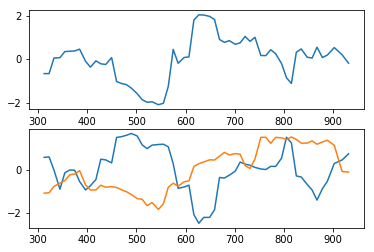

subject 17; gesture 1_1_2; avg 0.013450853187416791; sd 8.904458446538981e-11
subject 17; gesture 1_1_2; PoV: 0.9999999999999696


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


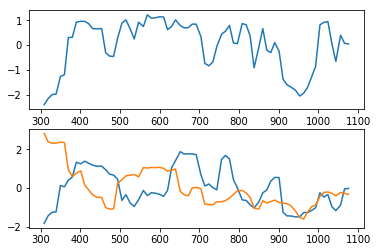

subject 17; gesture 1_1_1; avg 0.01724283240908777; sd 3.243475391075513e-06
subject 17; gesture 1_1_1; PoV: 0.9999997802489955


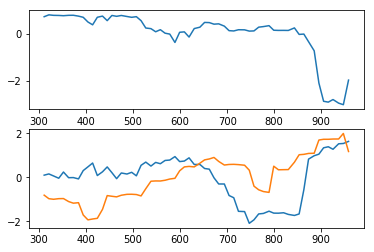

subject 17; gesture 1_0_1; avg 0.014264435487334897; sd 6.924352077286918e-08
subject 17; gesture 1_0_1; PoV: 0.9999999983817626


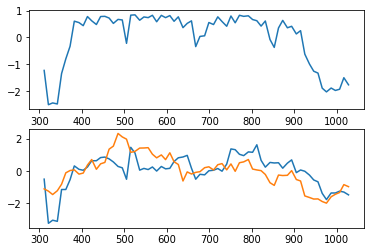

subject 17; gesture 1_0_2; avg 0.016218647034226638; sd 9.055494053258005e-10
subject 17; gesture 1_0_2; PoV: 0.9999999997762734


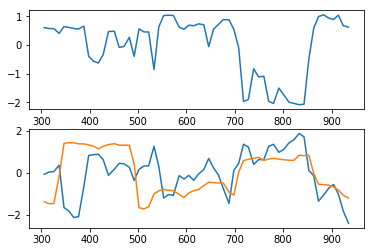

subject 01; gesture 1_1_2; avg 0.015689285942829083; sd 7.79645631864395e-06
subject 01; gesture 1_1_2; PoV: 0.9999925549996771


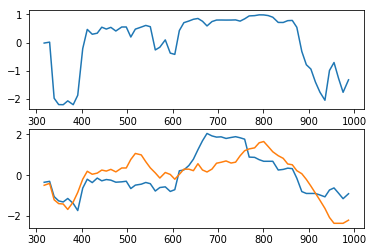

subject 01; gesture 1_1_1; avg 0.014555999597478888; sd 5.791534498066434e-11
subject 01; gesture 1_1_1; PoV: 0.9999999999999887


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


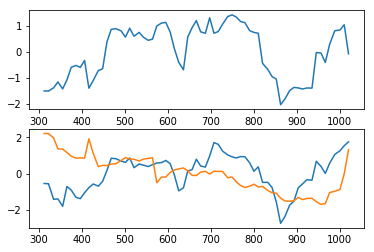

subject 01; gesture 1_0_1; avg 0.011021915119958231; sd 1.6746251751127654e-17
subject 01; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


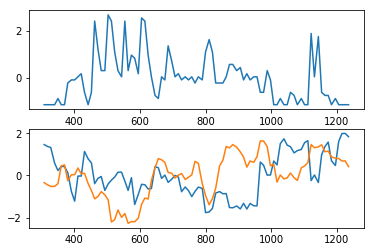

subject 01; gesture 1_0_2; avg 0.012257574606400215; sd 5.0587358343406265e-15


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


subject 01; gesture 1_0_2; PoV: 1.0


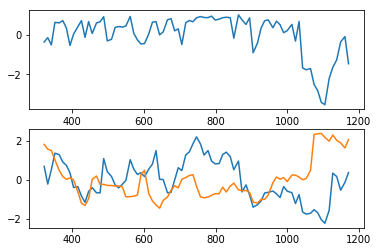

subject 16; gesture 1_1_2; avg 0.019333625253854063; sd 2.604856594383672e-08
subject 16; gesture 1_1_2; PoV: 0.9999999995856399


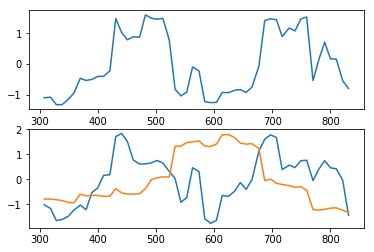

subject 16; gesture 1_1_1; avg 0.013723470946831361; sd 3.269863822487163e-08
subject 16; gesture 1_1_1; PoV: 0.9999999582448452


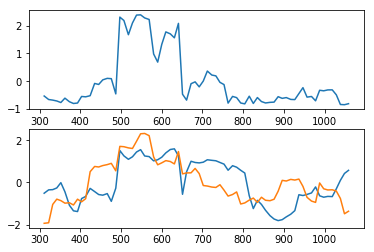

subject 16; gesture 1_0_1; avg 0.02197427135738605; sd 0.0031879649536327836
subject 16; gesture 1_0_1; PoV: 0.8784860103352822


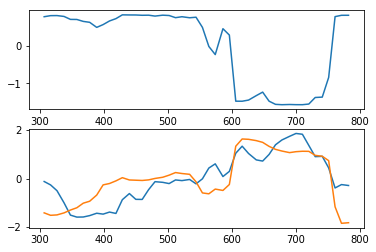

subject 16; gesture 1_0_2; avg 0.01790377249407237; sd 1.16203697292553e-09
subject 16; gesture 1_0_2; PoV: 0.9999999999133898


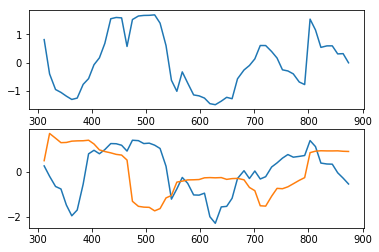

subject 26; gesture 1_1_2; avg 0.017993285942993636; sd 1.2842033487525714e-11
subject 26; gesture 1_1_2; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


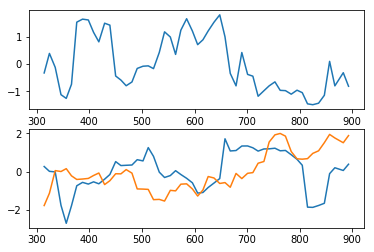

subject 26; gesture 1_1_1; avg 0.01789736071802171; sd 3.0129326893399574e-14
subject 26; gesture 1_1_1; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


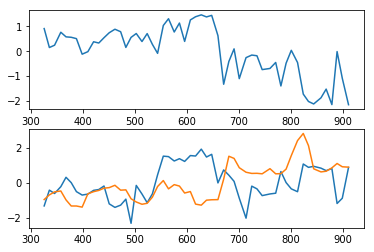

subject 26; gesture 1_0_1; avg 0.005050655039677062; sd 1.188613452407577e-09
subject 26; gesture 1_0_1; PoV: 0.9999999999924086


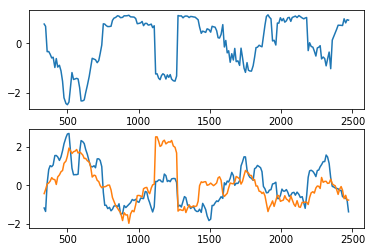

subject 26; gesture 1_0_2; avg 0.014929543519723717; sd 4.0521287180716056e-07
subject 26; gesture 1_0_2; PoV: 0.9999997093108582


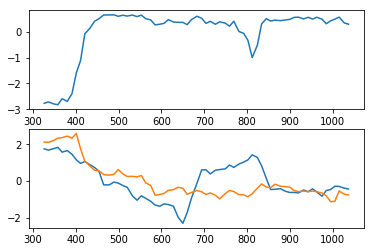

subject 32; gesture 1_1_2; avg 0.012852625009213482; sd 3.911464362853974e-12
subject 32; gesture 1_1_2; PoV: 0.9999999999999971


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


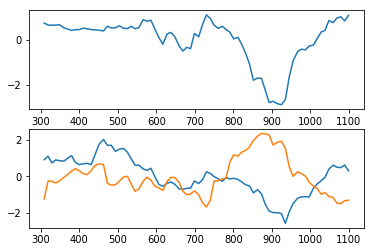

subject 32; gesture 1_1_1; avg 0.014744015570378148; sd 1.6326428495316304e-09
subject 32; gesture 1_1_1; PoV: 0.9999999990328444


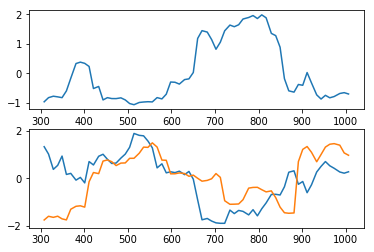

subject 32; gesture 1_0_1; avg 0.014321865857180652; sd 6.988131074547108e-09
subject 32; gesture 1_0_1; PoV: 0.9999999999333946


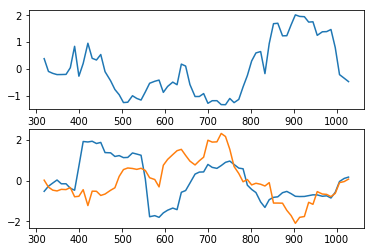

subject 32; gesture 1_0_2; avg 0.016980231764033075; sd 1.2977990555906972e-10
subject 32; gesture 1_0_2; PoV: 0.9999999999999707


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


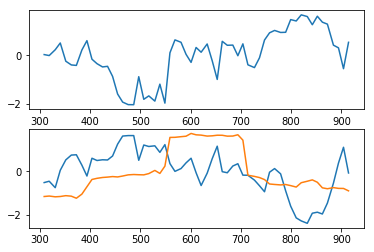

subject 04; gesture 1_1_2; avg 0.013825616069850178; sd 2.756804718066604e-10
subject 04; gesture 1_1_2; PoV: 0.9999999999997897


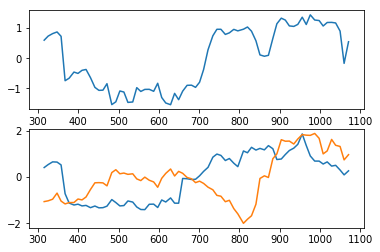

subject 04; gesture 1_1_1; avg 0.014603810817028004; sd 1.4942392515569676e-13
subject 04; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


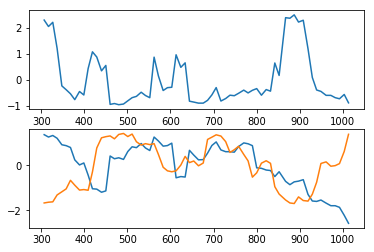

subject 04; gesture 1_0_1; avg 0.01699387643158098; sd 3.329249660621749e-07
subject 04; gesture 1_0_1; PoV: 0.9999999341068122


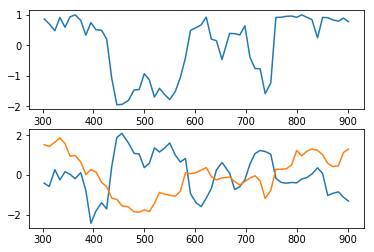

subject 04; gesture 1_0_2; avg 0.0159045091613162; sd 5.129012797235375e-10
subject 04; gesture 1_0_2; PoV: 0.9999999999999403


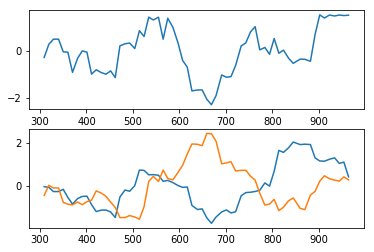

subject 08; gesture 1_1_2; avg 0.013733324834887591; sd 1.4083194136976508e-06
subject 08; gesture 1_1_2; PoV: 0.9999996337281597


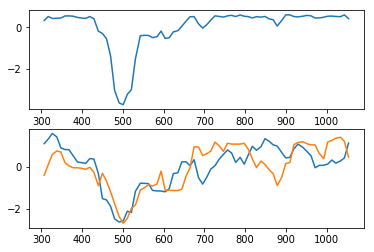

subject 08; gesture 1_1_1; avg 0.01627532602255303; sd 5.013476277536861e-09
subject 08; gesture 1_1_1; PoV: 0.9999999999900043


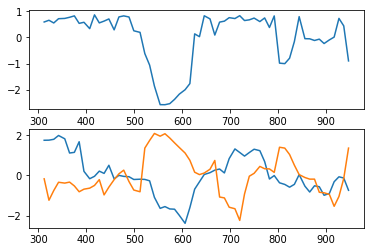

subject 08; gesture 1_0_1; avg 0.01506042448341033; sd 9.710244853159607e-14
subject 08; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


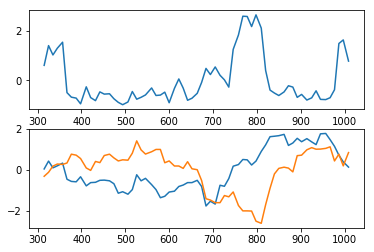

subject 08; gesture 1_0_2; avg 0.016178205223498415; sd 3.5180664608070646e-13
subject 08; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


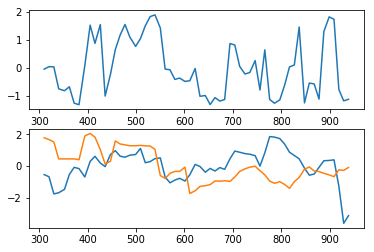

subject 27; gesture 1_1_2; avg 0.014474442631741333; sd 5.108019299740463e-13
subject 27; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


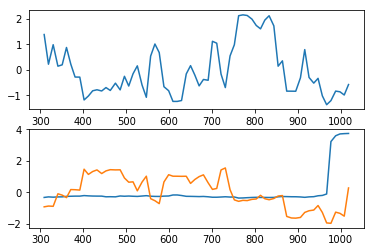

subject 27; gesture 1_1_1; avg 0.010438359296707216; sd 9.464259048383977e-17
subject 27; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


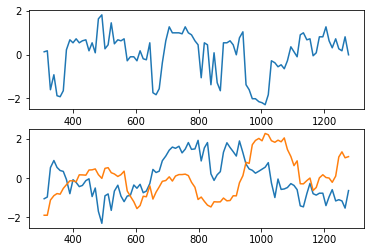

subject 27; gesture 1_0_1; avg 0.014493994711012256; sd 8.220090525020043e-14
subject 27; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


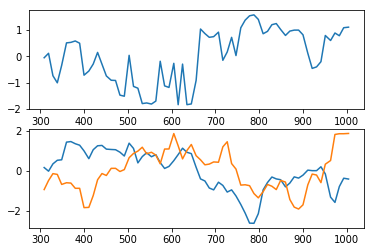

subject 27; gesture 1_0_2; avg 0.0156560318148573; sd 5.011537870602605e-12


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


subject 27; gesture 1_0_2; PoV: 1.0


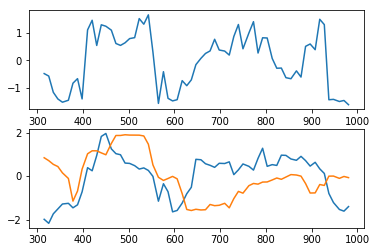

subject 14; gesture 1_1_2; avg 0.01338028011324693; sd 1.526775621330629e-16
subject 14; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


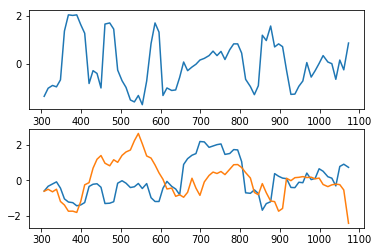

subject 14; gesture 1_1_1; avg 0.020128352209402445; sd 6.862750738603075e-10
subject 14; gesture 1_1_1; PoV: 0.9999999999982742


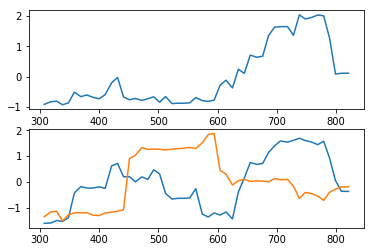

subject 14; gesture 1_0_1; avg 0.012792420895689736; sd 6.178776232069494e-11
subject 14; gesture 1_0_1; PoV: 0.9999999999999967


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


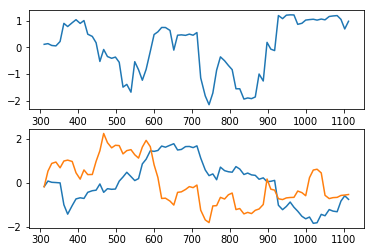

subject 14; gesture 1_0_2; avg 0.01416261081494626; sd 1.9352284149989567e-09
subject 14; gesture 1_0_2; PoV: 0.9999999999829767


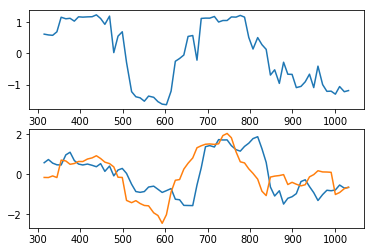

subject 23; gesture 1_1_2; avg 0.013067141731881072; sd 9.150144108400809e-16
subject 23; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


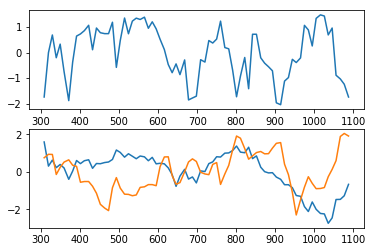

subject 23; gesture 1_1_1; avg 0.011786277170987992; sd 1.3553659966373419e-15
subject 23; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


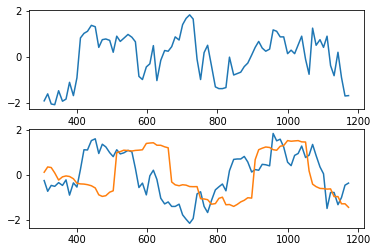

subject 23; gesture 1_0_1; avg 0.011945561524513112; sd 2.274408412952739e-13
subject 23; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


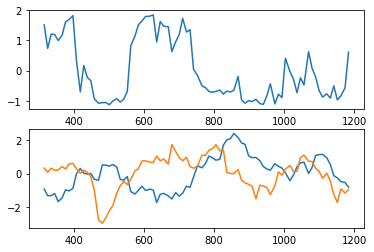

subject 23; gesture 1_0_2; avg 0.014436682928860597; sd 1.1234730857127061e-07
subject 23; gesture 1_0_2; PoV: 0.9999999941129223


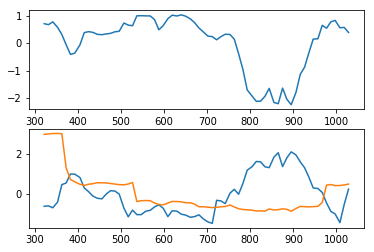

subject 25; gesture 1_1_2; avg 0.016251699166407552; sd 0.00011252181179194095
subject 25; gesture 1_1_2; PoV: 0.9987100393665441


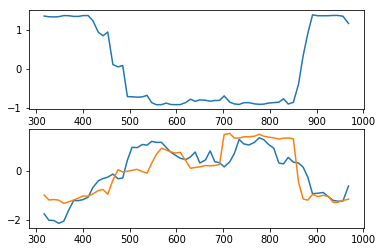

subject 25; gesture 1_1_1; avg 0.012137197768410699; sd 2.428357394121262e-11
subject 25; gesture 1_1_1; PoV: 0.9999999999999987


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


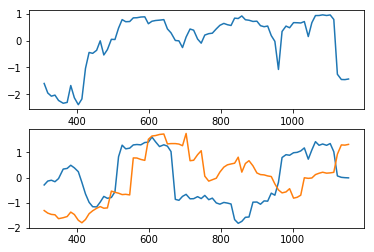

subject 25; gesture 1_0_1; avg 0.014827166935297204; sd 3.594331809473712e-07
subject 25; gesture 1_0_1; PoV: 0.9999999607542273


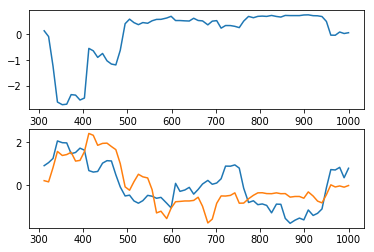

subject 25; gesture 1_0_2; avg 0.0163301626120661; sd 8.373159016780996e-09
subject 25; gesture 1_0_2; PoV: 0.9999999997258713


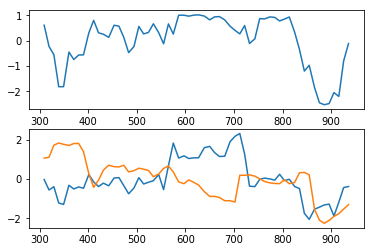

subject 18; gesture 1_1_2; avg 0.012523311187423948; sd 4.795514843082774e-09
subject 18; gesture 1_1_2; PoV: 0.9999999997222213


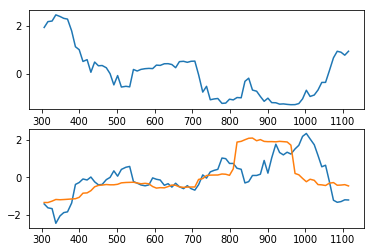

subject 18; gesture 1_1_1; avg 0.013112197528418142; sd 2.6698889864737803e-07
subject 18; gesture 1_1_1; PoV: 0.9999999717260042


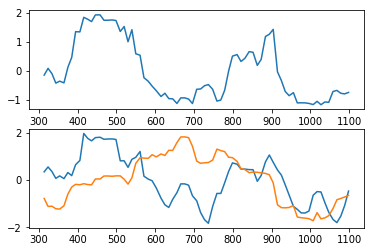

subject 18; gesture 1_0_1; avg 0.01887755711278633; sd 5.844290569562837e-09
subject 18; gesture 1_0_1; PoV: 0.9999999999935969


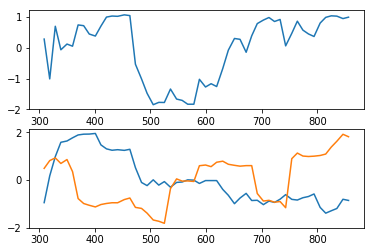

subject 18; gesture 1_0_2; avg 0.012545340019910287; sd 6.056418818681128e-09
subject 18; gesture 1_0_2; PoV: 0.9999999999864267


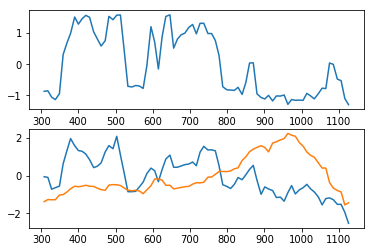

subject 29; gesture 1_1_2; avg 0.015252930130702376; sd 4.71197186064777e-09
subject 29; gesture 1_1_2; PoV: 0.9999999999294292


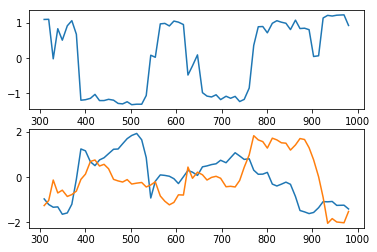

subject 29; gesture 1_1_1; avg 0.017866272348421978; sd 1.5411456731499351e-09
subject 29; gesture 1_1_1; PoV: 0.9999999999681258


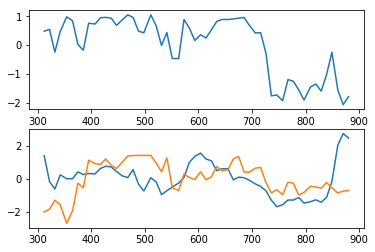

subject 29; gesture 1_0_1; avg 0.014961797450098716; sd 1.2589717402023987e-11
subject 29; gesture 1_0_1; PoV: 0.9999999999999991


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


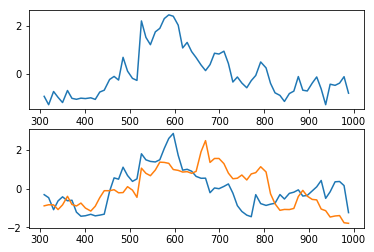

subject 29; gesture 1_0_2; avg 0.01480062279115271; sd 1.07168700403778e-09
subject 29; gesture 1_0_2; PoV: 0.9999999999998408


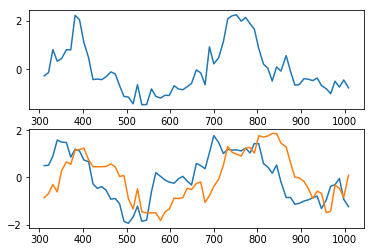

subject 15; gesture 1_1_2; avg 0.012529860540698354; sd 8.788397086540434e-08
subject 15; gesture 1_1_2; PoV: 0.9999999854605243


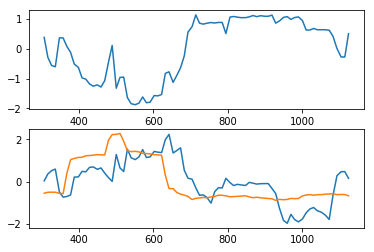

subject 15; gesture 1_1_1; avg 0.016161584491474507; sd 3.710596798196923e-10
subject 15; gesture 1_1_1; PoV: 0.9999999999999531


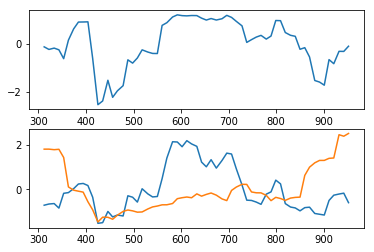

subject 15; gesture 1_0_1; avg 0.016966636886819885; sd 1.2325915293559436e-12
subject 15; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


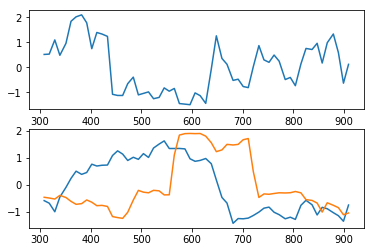

subject 15; gesture 1_0_2; avg 0.01539879748508197; sd 5.905059711956746e-09
subject 15; gesture 1_0_2; PoV: 0.9999999995842741


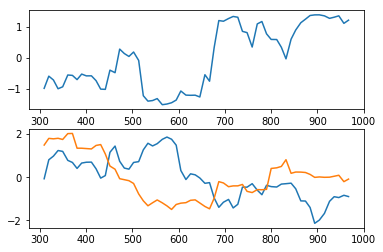

subject 28; gesture 1_1_2; avg 0.020896214635440464; sd 3.443401794808795e-08
subject 28; gesture 1_1_2; PoV: 0.9999999973656667


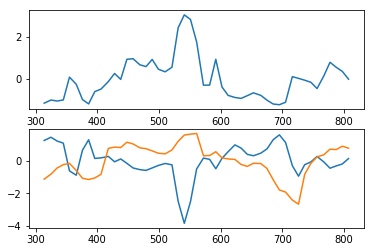

subject 28; gesture 1_1_1; avg 0.02496452495386817; sd 1.351675698793718e-09
subject 28; gesture 1_1_1; PoV: 0.9999999999990832


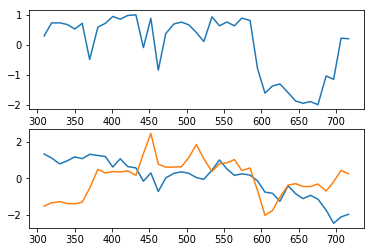

subject 28; gesture 1_0_1; avg 0.018576693533050245; sd 2.78121563128775e-10
subject 28; gesture 1_0_1; PoV: 0.9999999999978131


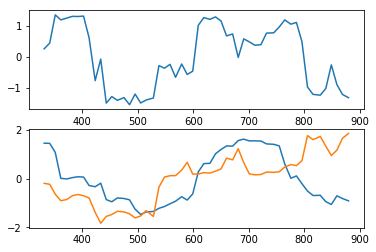

subject 28; gesture 1_0_2; avg 0.016739646566469143; sd 4.321982397482579e-12
subject 28; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


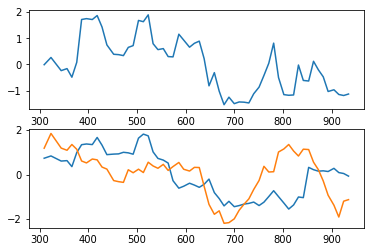

subject 12; gesture 1_1_2; avg 0.013394026442309939; sd 2.783255202677971e-12
subject 12; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


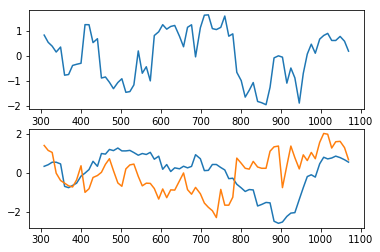

subject 12; gesture 1_1_1; avg 0.013740204740930167; sd 6.099951746770301e-10
subject 12; gesture 1_1_1; PoV: 0.9999999999983069


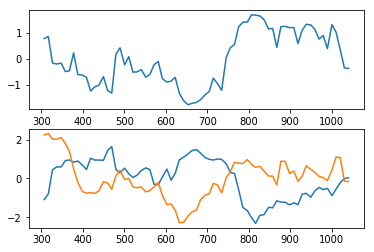

subject 12; gesture 1_0_1; avg 0.01361532041882887; sd 5.283344683874378e-13
subject 12; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


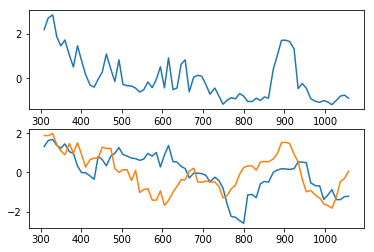

subject 12; gesture 1_0_2; avg 0.015923023732846996; sd 1.173774628046917e-11
subject 12; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


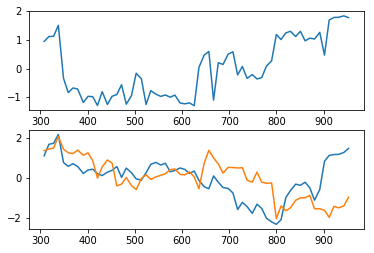

subject 19; gesture 1_1_2; avg 0.012978127408759737; sd 1.5974438263721364e-08
subject 19; gesture 1_1_2; PoV: 0.999999999771561


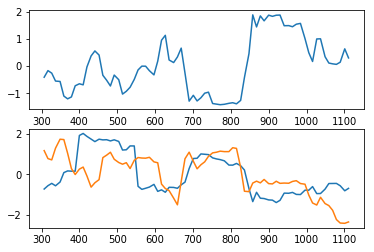

subject 19; gesture 1_1_1; avg 0.016505150510061822; sd 9.112529683753153e-09
subject 19; gesture 1_1_1; PoV: 0.9999999998473323


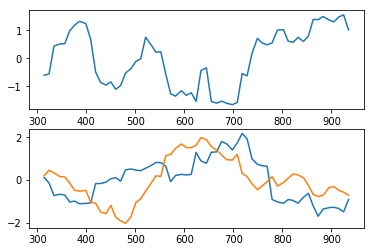

subject 19; gesture 1_0_1; avg 0.019697493268240707; sd 3.747135312037098e-07
subject 19; gesture 1_0_1; PoV: 0.999999989448101


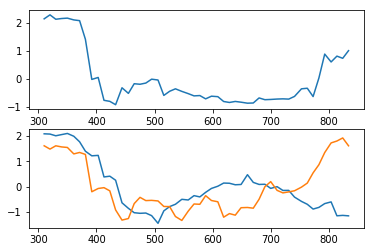

subject 19; gesture 1_0_2; avg 0.01569622565236686; sd 2.365749627220785e-12
subject 19; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


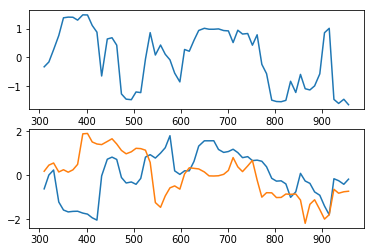

subject 07; gesture 1_1_2; avg 0.012123109411199606; sd 1.3535862227567057e-11
subject 07; gesture 1_1_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


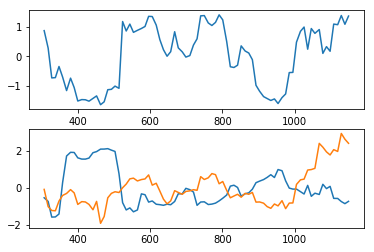

subject 07; gesture 1_1_1; avg 0.014638780508639093; sd 1.1806286604582875e-08
subject 07; gesture 1_1_1; PoV: 0.9999999995325892


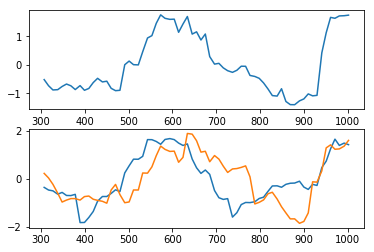

subject 07; gesture 1_0_1; avg 0.010888525526359718; sd 1.0733362038898166e-13
subject 07; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


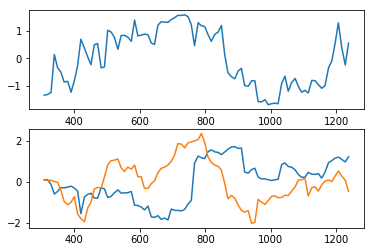

subject 07; gesture 1_0_2; avg 0.013502670672269398; sd 1.4505056520104184e-13
subject 07; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


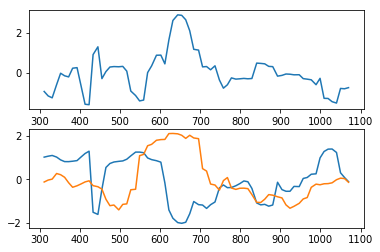

subject 20; gesture 1_1_2; avg 0.013451279640807163; sd 6.382739254747517e-08
subject 20; gesture 1_1_2; PoV: 0.9999999991927624


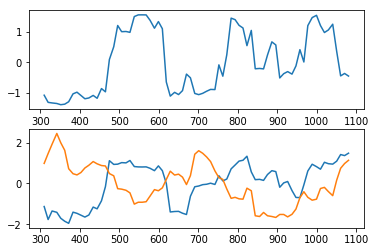

subject 20; gesture 1_1_1; avg 0.012410048133826776; sd 1.1515642197666664e-13
subject 20; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


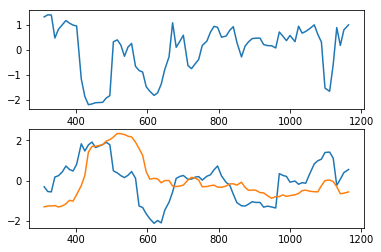

subject 20; gesture 1_0_1; avg 0.012747552406455153; sd 2.0144233279707406e-09
subject 20; gesture 1_0_1; PoV: 0.9999999999976269


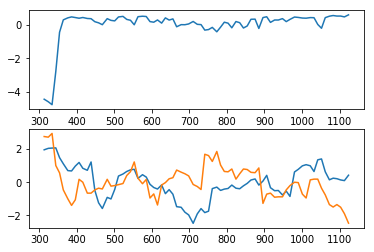

subject 20; gesture 1_0_2; avg 0.009725139943302681; sd 5.5445226063104835e-12
subject 20; gesture 1_0_2; PoV: 0.9999999999999989


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


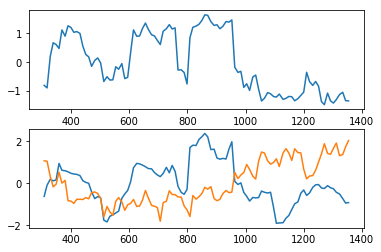

/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


subject 31; gesture 1_1_2; avg 0.01615612016523836; sd 5.994443945201882e-12
subject 31; gesture 1_1_2; PoV: 0.9999999999999998


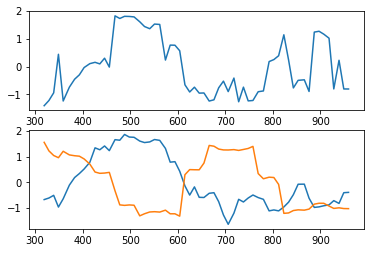

subject 31; gesture 1_1_1; avg 0.016017011170355398; sd 2.3117811972437657e-05
subject 31; gesture 1_1_1; PoV: 0.9999581153122554


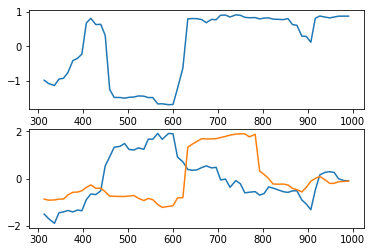

subject 31; gesture 1_0_1; avg 0.01055760251891615; sd 1.686848968605655e-15
subject 31; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


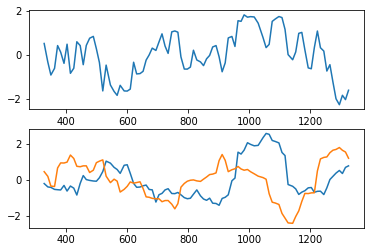

subject 31; gesture 1_0_2; avg 0.015179345878734317; sd 9.02291882478306e-09
subject 31; gesture 1_0_2; PoV: 0.999999999903595


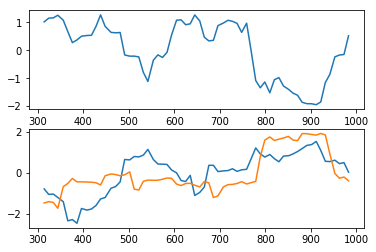

subject 13; gesture 1_1_2; avg 0.011285720223523393; sd 9.217757968199288e-07
subject 13; gesture 1_1_2; PoV: 0.9999994778718052


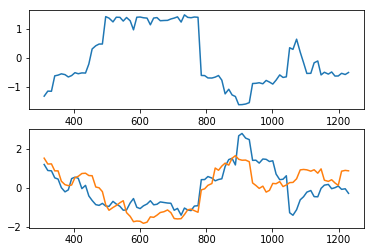

subject 13; gesture 1_1_1; avg 0.012781593372588522; sd 1.2599456110452516e-11
subject 13; gesture 1_1_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


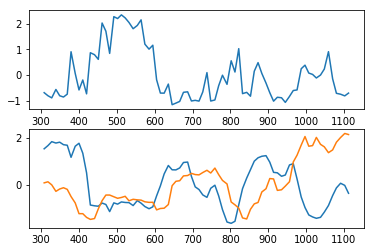

subject 13; gesture 1_0_1; avg 0.005569158164142916; sd 1.354399541347828e-18
subject 13; gesture 1_0_1; PoV: 1.0000000000000004


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


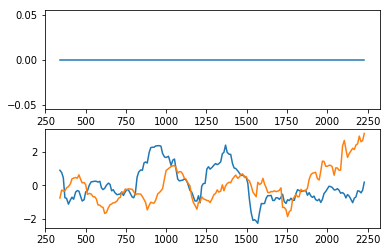

subject 13; gesture 1_0_2; avg 0.009752341599381964; sd 7.504961660408156e-12
subject 13; gesture 1_0_2; PoV: 0.9999999999999933


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


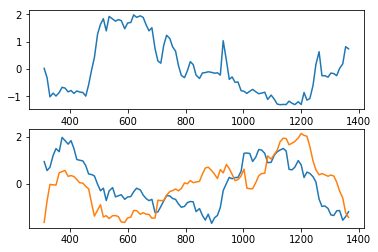

subject 36; gesture 1_1_2; avg 0.015159349992242504; sd 1.3584432874683849e-12
subject 36; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


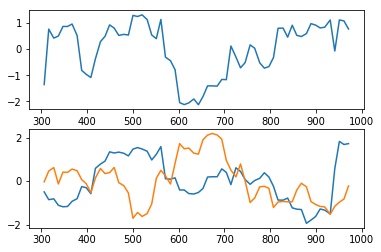

subject 36; gesture 1_1_1; avg 0.013190492459072386; sd 2.628115058812268e-13
subject 36; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


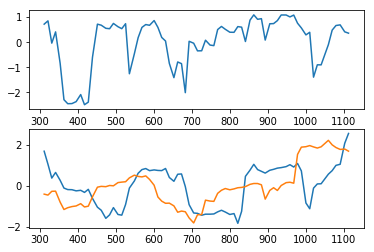

subject 36; gesture 1_0_1; avg 0.016735322916331258; sd 4.337522808387329e-09
subject 36; gesture 1_0_1; PoV: 0.9999999999717519


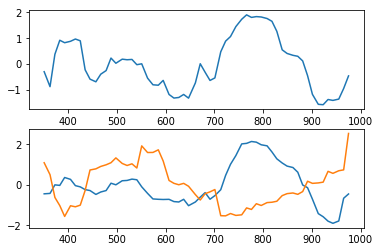

subject 36; gesture 1_0_2; avg 0.01670097093086019; sd 1.6612029198960875e-10
subject 36; gesture 1_0_2; PoV: 0.9999999999996257


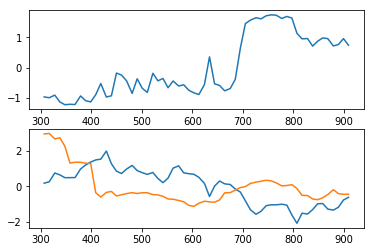

subject 24; gesture 1_1_2; avg 0.014140788300256724; sd 1.2940144725075493e-12
subject 24; gesture 1_1_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


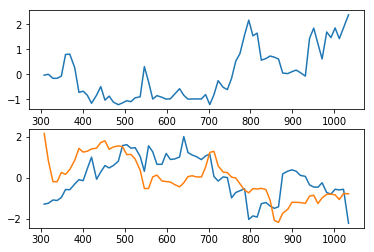

subject 24; gesture 1_1_1; avg 0.015980802124694837; sd 1.660782127509926e-08
subject 24; gesture 1_1_1; PoV: 0.9999999996375478


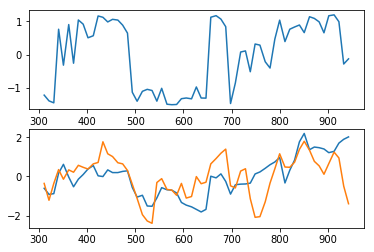

subject 24; gesture 1_0_1; avg 0.012955988596846456; sd 2.202258669467078e-11
subject 24; gesture 1_0_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


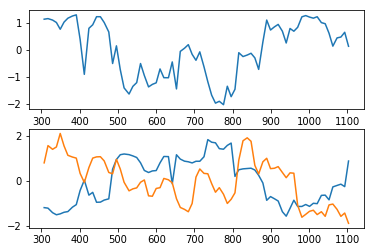

subject 24; gesture 1_0_2; avg 0.013751242252507586; sd 7.3651424248862e-10
subject 24; gesture 1_0_2; PoV: 0.9999999999993422


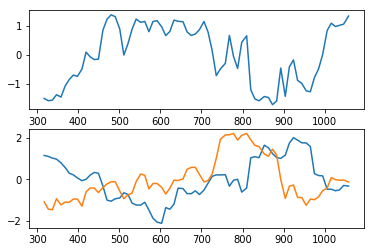

subject 33; gesture 1_1_2; avg 0.013668487263263812; sd 6.316244797140448e-07
subject 33; gesture 1_1_2; PoV: 0.9999998553333571


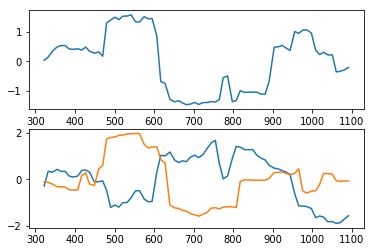

subject 33; gesture 1_1_1; avg 0.013382729264117708; sd 2.4343105403196623e-11
subject 33; gesture 1_1_1; PoV: 0.9999999999999474


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


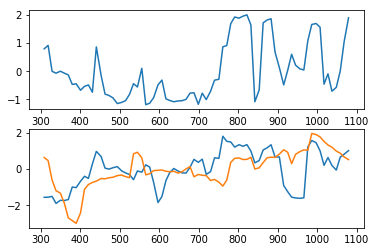

subject 33; gesture 1_0_1; avg 0.014329225554299935; sd 6.308133758424622e-11
subject 33; gesture 1_0_1; PoV: 0.9999999999999732


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


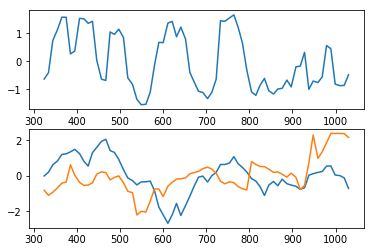

subject 33; gesture 1_0_2; avg 0.013303177047305497; sd 5.76505397245856e-10
subject 33; gesture 1_0_2; PoV: 0.9999999999998263


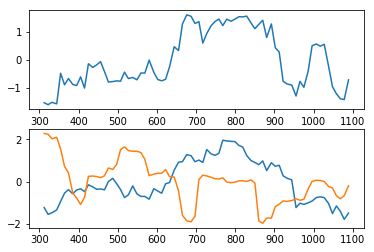

subject 11; gesture 1_1_2; avg 0.01269829398913657; sd 7.272286337840217e-13
subject 11; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


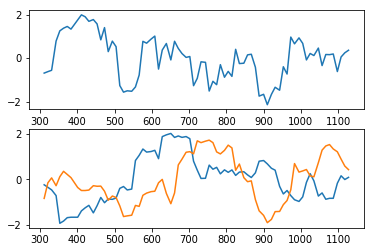

subject 11; gesture 1_1_1; avg 0.011649661885010721; sd 1.1749991034542478e-07
subject 11; gesture 1_1_1; PoV: 0.9999999952706742


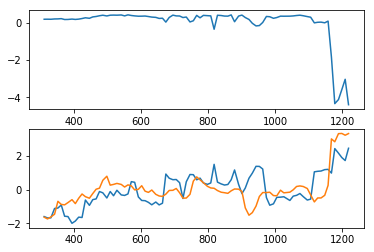

subject 11; gesture 1_0_1; avg 0.011945758143747808; sd 4.016856816637867e-09
subject 11; gesture 1_0_1; PoV: 0.9999999998872072


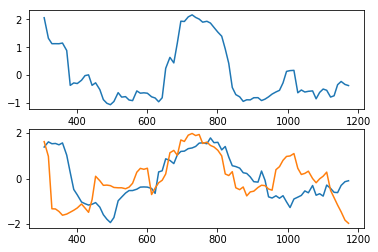

subject 11; gesture 1_0_2; avg 0.01412423332717531; sd 1.0928902972930367e-10
subject 11; gesture 1_0_2; PoV: 0.9999999999999347


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


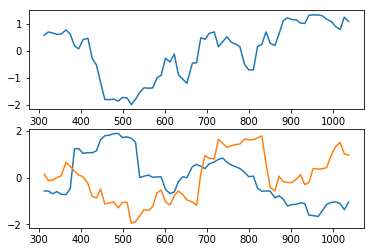

subject 35; gesture 1_1_2; avg 0.013667779914588419; sd 2.7900662378326555e-09
subject 35; gesture 1_1_2; PoV: 0.9999999999637603


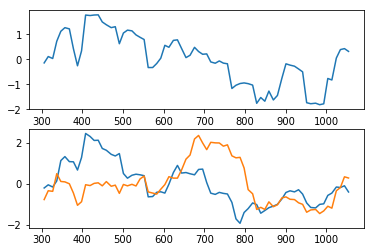

subject 35; gesture 1_1_1; avg 0.018145659535966543; sd 3.3078311108245393e-09
subject 35; gesture 1_1_1; PoV: 0.9999999999994493


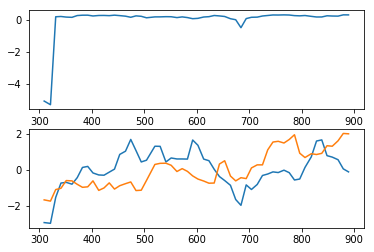

subject 35; gesture 1_0_1; avg 0.014791361149666612; sd 5.340975523076388e-10
subject 35; gesture 1_0_1; PoV: 0.9999999999996938


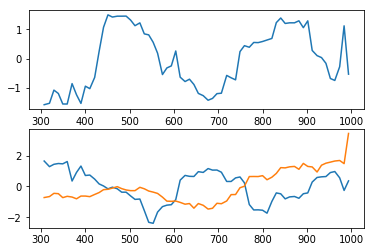

subject 35; gesture 1_0_2; avg 0.012716703011182722; sd 2.4401602974128494e-11
subject 35; gesture 1_0_2; PoV: 0.9999999999999989


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


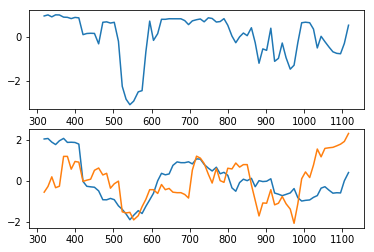

/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


subject 22; gesture 1_1_2; avg 0.01909719818184247; sd 1.5228365646050543e-11
subject 22; gesture 1_1_2; PoV: 0.9999999999999998


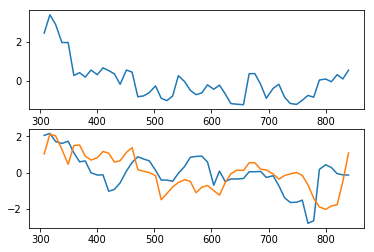

subject 22; gesture 1_1_1; avg 0.015346026449171577; sd 1.44604287947158e-12


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


subject 22; gesture 1_1_1; PoV: 1.0000000000000002


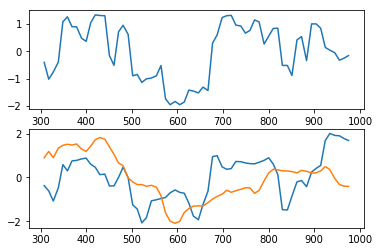

subject 22; gesture 1_0_1; avg 0.016980295427211373; sd 2.4638787326827092e-08
subject 22; gesture 1_0_1; PoV: 0.9999999759501823


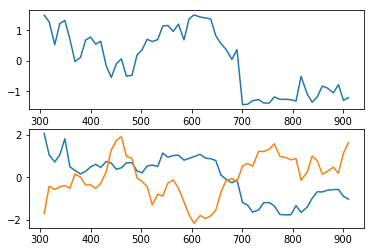

subject 22; gesture 1_0_2; avg 0.014097214132578256; sd 8.469787995285348e-13
subject 22; gesture 1_0_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


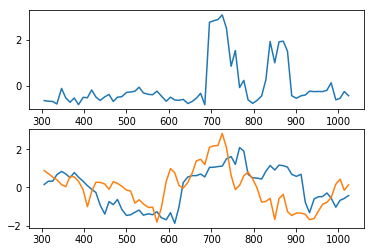

subject 34; gesture 1_1_2; avg 0.015001064241077031; sd 3.75429476041264e-10
subject 34; gesture 1_1_2; PoV: 0.999999999999725


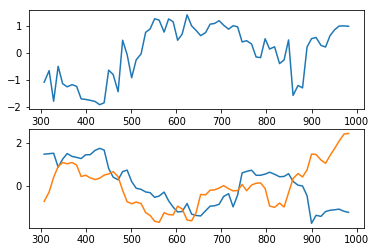

subject 34; gesture 1_1_1; avg 0.010630891987031165; sd 3.408991024438043e-11
subject 34; gesture 1_1_1; PoV: 0.9999999999999993


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


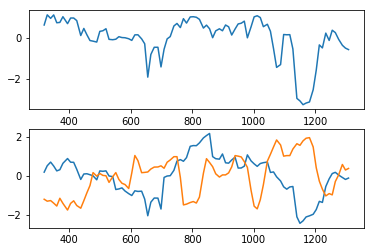

subject 34; gesture 1_0_1; avg 0.01260328369386313; sd 1.1638453248076833e-07
subject 34; gesture 1_0_1; PoV: 0.9999999915551107


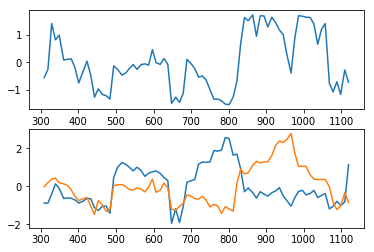

subject 34; gesture 1_0_2; avg 0.013011163584829226; sd 3.9479107412784497e-13
subject 34; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


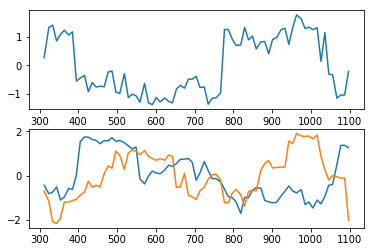

subject 10; gesture 1_1_2; avg 0.01583171776016239; sd 1.078117618863368e-08
subject 10; gesture 1_1_2; PoV: 0.9999999999442674


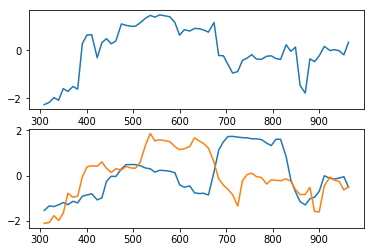

subject 10; gesture 1_1_1; avg 0.013346230206655131; sd 7.995975813143159e-09
subject 10; gesture 1_1_1; PoV: 0.9999999994736959


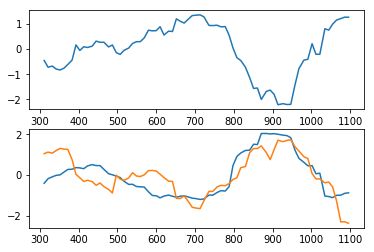

subject 10; gesture 1_0_1; avg 0.008553371390544842; sd 5.322359624623876e-17
subject 10; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


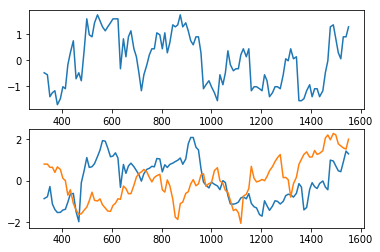

subject 10; gesture 1_0_2; avg 0.014430564599459276; sd 8.52793179560658e-09
subject 10; gesture 1_0_2; PoV: 0.9999999998787632


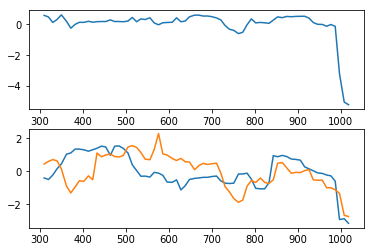

subject 02; gesture 1_1_2; avg 0.013801710187219207; sd 1.931721688917221e-07
subject 02; gesture 1_1_2; PoV: 0.9999999399722882


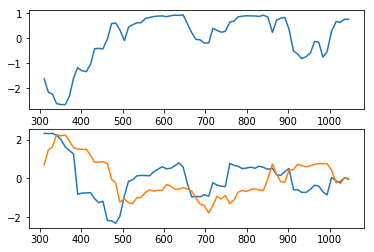

subject 02; gesture 1_1_1; avg 0.011865779253311018; sd 1.075884188228612e-09
subject 02; gesture 1_1_1; PoV: 0.9999999999826614


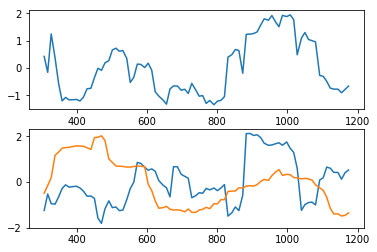

subject 02; gesture 1_0_1; avg 0.015439293576823138; sd 1.5019865935928104e-12
subject 02; gesture 1_0_1; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


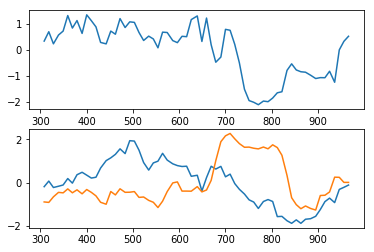

subject 02; gesture 1_0_2; avg 0.013611852396714688; sd 1.4718003641840933e-09
subject 02; gesture 1_0_2; PoV: 0.9999999999980275


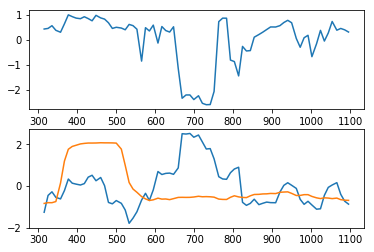

In [5]:
decomp_g1_ant = {}

for s, gdict in g1_dict_antag.items():
    decomp_g1_ant[s] = {}
    for g, a in gdict.items():
        print(f"subject {s}; gesture {g}; avg {a.mean()}; sd {a.std()}")
        evals, evecs = la.eig(a)
        evals = evals.real
        sort_idx = np.argsort(-evals)
        evals = evals[sort_idx]
        evecs = evecs[:, sort_idx]
        # calc percent of variance explained
        print(f"subject {s}; gesture {g}; PoV: {evals[0].real / evals.real.sum()}")
        # do PCA
        res = a @ evecs[:, 0]
        res = scale(res.real)
        decomp_g1_ant[s][g] = res
        # plot results
        plt.subplot(211)
        plt.plot(dc.data_set_smooth[s][g][:,0], res)
        plt.subplot(212)
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,1])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,2])
        plt.show()

---

Problem cases:

subject 30; gesture 1_1_2

subject 06; gesture 1_0_2

subject 09; gesture 1_1_2

subject 03; gesture 1_1_2

subject 03; gesture 1_1_1

subject 05; gesture 1_0_1

subject 21; gesture 1_0_2

subject 21; gesture 1_1_1

subject 01; gesture 1_1_2

subject 01; gesture 1_1_1

subject 01; gesture 1_0_2

26

gesture 1_1_2

gesture 1_0_1

32

gesture 1_1_1

08

gesture 1_1_2

gesture 1_0_1

27

gesture 1_1_1

gesture 1_0_2

23

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

25

gesture 1_0_1


18

gesture 1_1_2

gesture 1_1_1

29

gesture 1_1_1

gesture 1_0_1

15

gesture 1_1_1

12

gesture 1_1_2

gesture 1_0_1

19

gesture 1_1_1

07

gesture 1_1_2

gesture 1_0_1

gesture 1_0_2

20

gesture 1_0_1

31

gesture 1_1_2

gesture 1_0_1

13

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

36

gesture 1_1_2

24

gesture 1_1_1

gesture 1_0_1

33

gesture 1_0_1

11

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

gesture 1_0_2

35

gesture 1_0_2

22

gesture 1_0_1

gesture 1_0_2

34

gesture 1_0_1

gesture 1_0_2

10

gesture 1_1_2

gesture 1_0_1

---

In [6]:
# average distance between all gestures in subject s cross subject v (cartesian product)
# i.e. average distance between subjects' gestures
compares = {}
for s1, gdict1 in decomp_g1_ant.items():
    compares[s1] = {}
    for s2, gdict2 in decomp_g1_ant.items():
        compares[s1][s2] = []
        for g1 in gdict1.values():
            for g2 in gdict2.values():
                compares[s1][s2].append(dtw(g1, g2))
        compares[s1][s2] = np.average(compares[s1][s2])

In [7]:
np.average([d for d in compares["30"].values()])

7.0902687809765235